**Essential imports for logistic regression**  

In [1]:
import numpy as np
import random as rand
import math as ma
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import time

**Mounting Google Drive**

In [2]:
# from google.colab import drive
# drive.mount('/content/myDrive')

**Importing Data Sets**

In [3]:
# Change the path here to find your local hep and bank csv files
# /Users/jhu69/Desktop/McGill_Masters/Fall_2020/ECSE_551/LogisticsRegression/ECSE_551_Machine_Learning/LogisticalRegression

# Importing as pandas df objects
df_h = pd.read_csv('/Users/jhu69/Desktop/McGill_Masters/Fall_2020/ECSE_551/LogisticsRegression/ECSE_551_Machine_Learning/LogisticalRegression/hepatitis.csv')
df_b = pd.read_csv('/Users/jhu69/Desktop/McGill_Masters/Fall_2020/ECSE_551/LogisticsRegression/ECSE_551_Machine_Learning/LogisticalRegression/bankrupcy.csv')

if df_b.empty == True or df_h.empty == True:
  print("Failed to load one or more data set(s)!")
else:
  print("Both data sets have been loaded into pandas data frame objects!")

# Converting into numpy arrays
arr_h = df_h.to_numpy()
arr_b = df_b.to_numpy()
if type(arr_h) is np.ndarray and type(arr_b) is np.ndarray:
  print("Coverted both data frames into numpy arrays!")
else:
  print("Conversion to ndarrays was not successful!")


Both data sets have been loaded into pandas data frame objects!
Coverted both data frames into numpy arrays!


**Reshuffling our Datasets**

In [4]:
# Shuffling our data set in order to get a more distrubuted data set of our 
# class labels
def reshuffle(X):
  temp = np.zeros_like(X)
  indices = np.linspace(0, X.shape[0]-1, num=X.shape[0], dtype=int)
  # print("indicies:")
  # print(indices)
  rand.shuffle(indices)
  # print("indicies reshuffled:")
  # print(indices)
  for i in range (0, len(indices)):
    temp[i,:] = X[indices[i],:]
  return temp

In [5]:
# Reshuffling our data sets
# WARNING: this should only be ran one time at the very begining
# if this is modified, then you will have to restart kernel and run all
# in order for your runExperiment function to make sense and for the 
# runModelSelected function to make sense as well cause it all depends on this 
# iterations reshuffled order
arr_h = reshuffle(arr_h)
arr_b = reshuffle(arr_b)

**Splitting Data Sets: Data from Label**

In [6]:
# savetxt('data_bank.csv', arr_b, delimiter=',')
arr_b_Saved = pd.read_csv('/Users/jhu69/Desktop/McGill_Masters/Fall_2020/ECSE_551/LogisticsRegression/ECSE_551_Machine_Learning/LogisticalRegression/data_bank.csv')
arr_b =arr_b_Saved.to_numpy()
arr_h_Saved = pd.read_csv('/Users/jhu69/Desktop/McGill_Masters/Fall_2020/ECSE_551/LogisticsRegression/ECSE_551_Machine_Learning/LogisticalRegression/data_hepa.csv')
arr_h =arr_h_Saved.to_numpy()
# Hepatitis and Bankruptcy Data sets
Xh = arr_h[:,:-1]
Yh = arr_h[:,-1:]
Xb = arr_b[:,:-1]
Yb = arr_b[:,-1:]
print("Split the data sets into X and Y matrices.")
# savetxt('data_hepa.csv', arr_h, delimiter=',')

Split the data sets into X and Y matrices.


**Appending The Bias Term To The Data Sets**

In [7]:
# WARNING: Do not run this section more than once
def addBias(Xh, Xb):
  # Add column of 1's to the left of the X arrays 
  Xh = np.concatenate((np.ones((Xh.shape[0],1)),Xh),1)
  Xb = np.concatenate((np.ones((Xb.shape[0],1)),Xb),1)
  return Xh, Xb

In [8]:
Xh, Xb = addBias(Xh, Xb)

**Normalizing Feature Values before Visualization**

In [9]:
# Normalize the features of X so that their range is between 0 and 1 (Useful when feature distributions do not follow any known patterns)
def featureNormalization(X):
  Xminmax = (X-np.amin(X,axis=0))/(np.amax(X,axis=0)-np.amin(X,axis=0))
  return Xminmax

In [10]:
# WARNING: Use these variables for visualizing the data only!!!!!
XhV = featureNormalization(Xh)
XbV = featureNormalization(Xb)

<ipython-input-9-cd4147c254a2>:3: RuntimeWarning: invalid value encountered in true_divide
  Xminmax = (X-np.amin(X,axis=0))/(np.amax(X,axis=0)-np.amin(X,axis=0))


**Visualizing Data Set: Hepatitis**

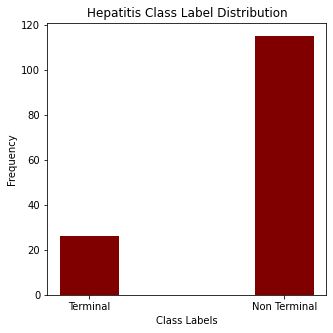

In [11]:
# Distribution of Terminal vs Non Terminal
# We are assuming class label 0 = terminal and class label 1 = non terminal
nonTerminalCount = np.count_nonzero(Yh)
terminalCount = arr_h.shape[0] - nonTerminalCount
classLabelsH = ["Terminal", "Non Terminal"]
classLabelCountH = [terminalCount, nonTerminalCount]
plt.figure(figsize=(5,5))
plt.bar(classLabelsH, classLabelCountH, color='maroon', width=0.3)
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.title("Hepatitis Class Label Distribution")
plt.show()

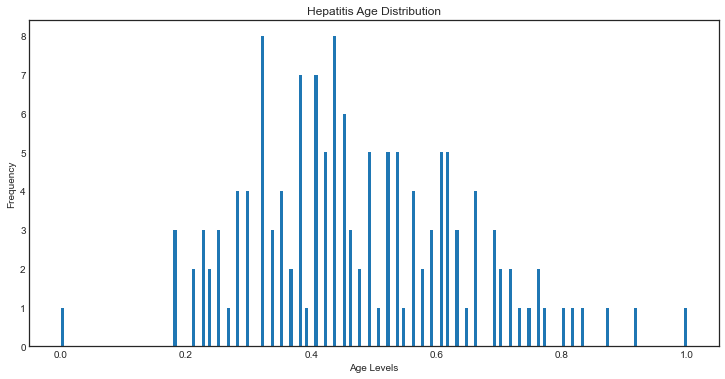

Column index: 1


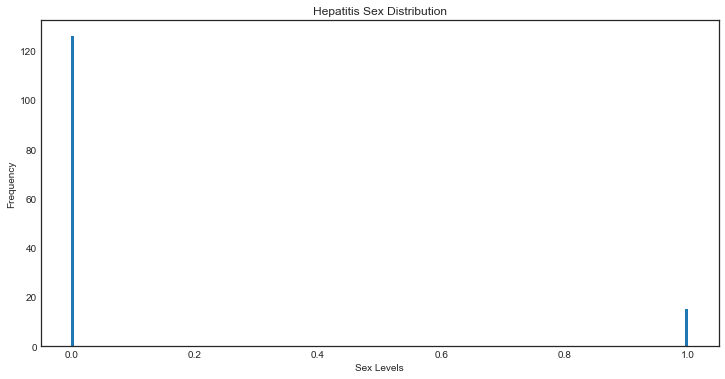

Column index: 2


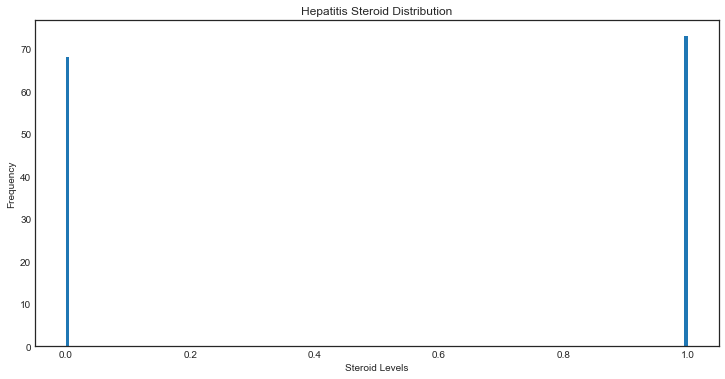

Column index: 3


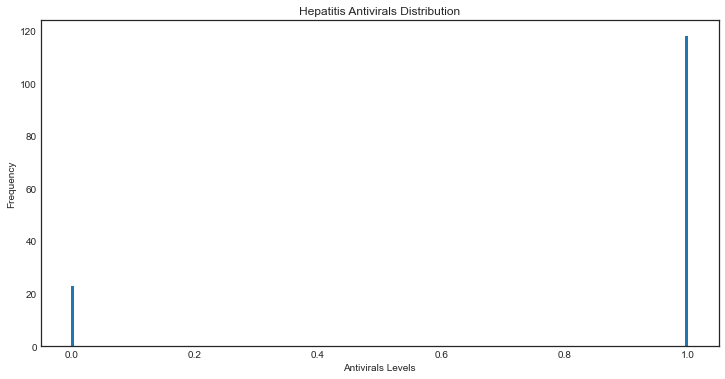

Column index: 4


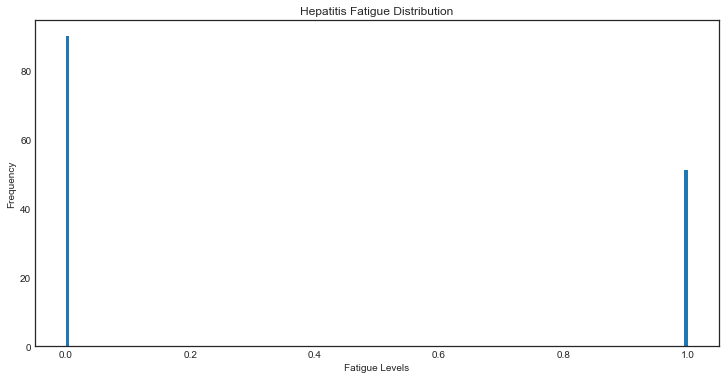

Column index: 5


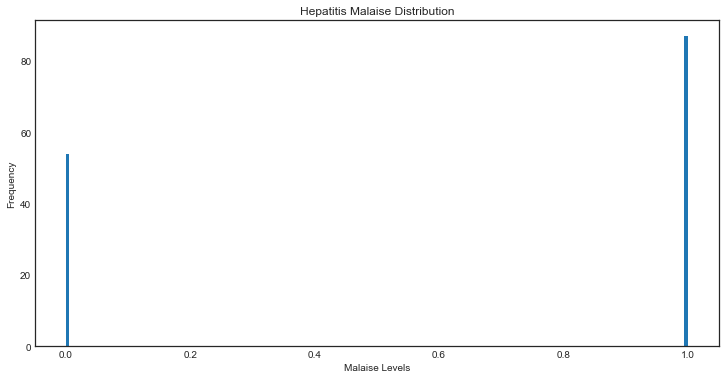

Column index: 6


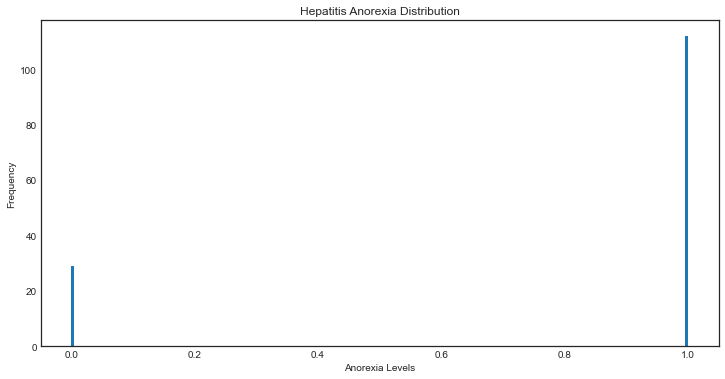

Column index: 7


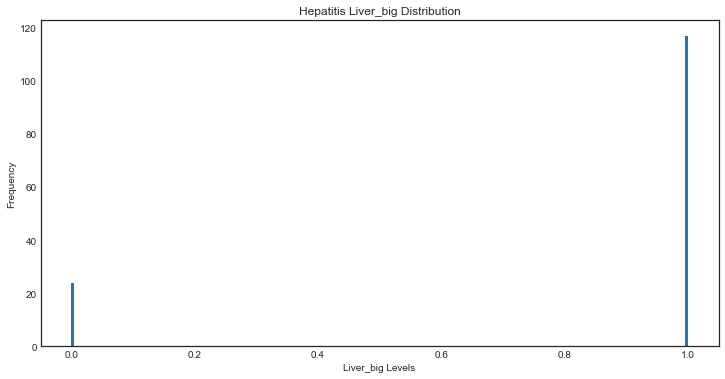

Column index: 8


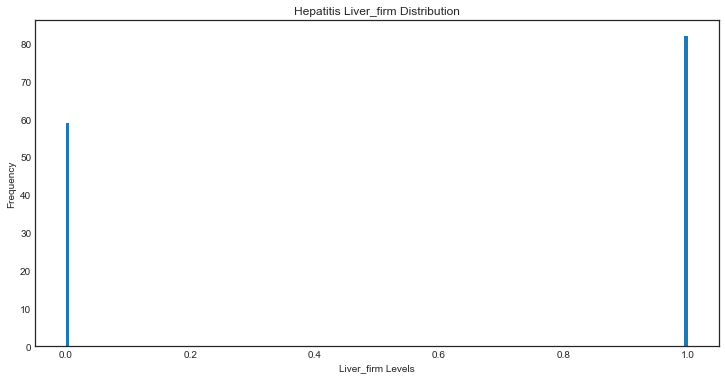

Column index: 9


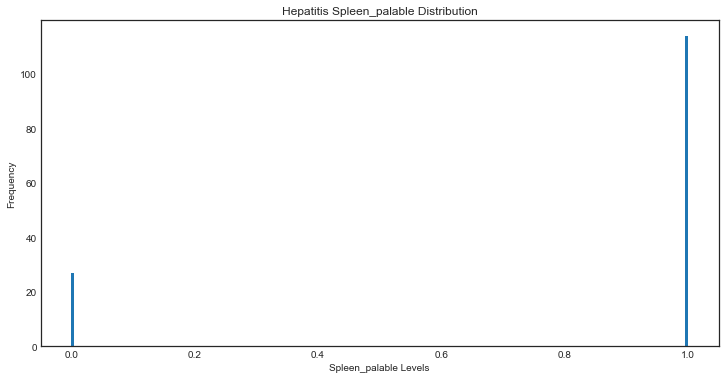

Column index: 10


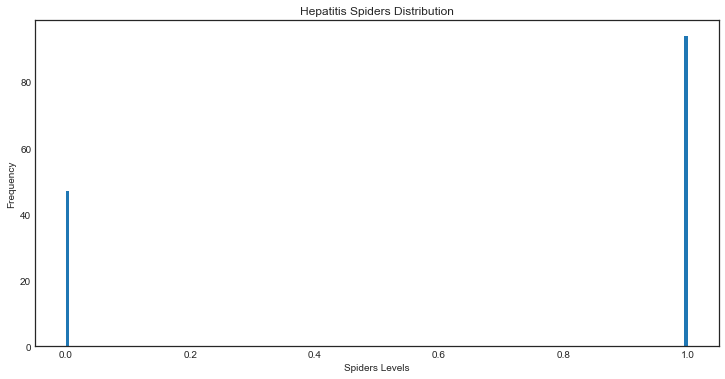

Column index: 11


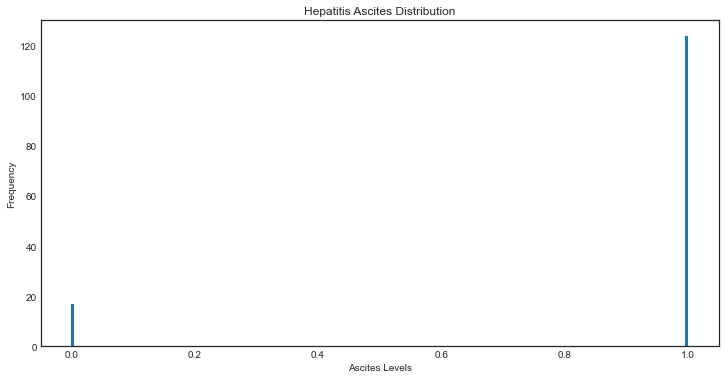

Column index: 12


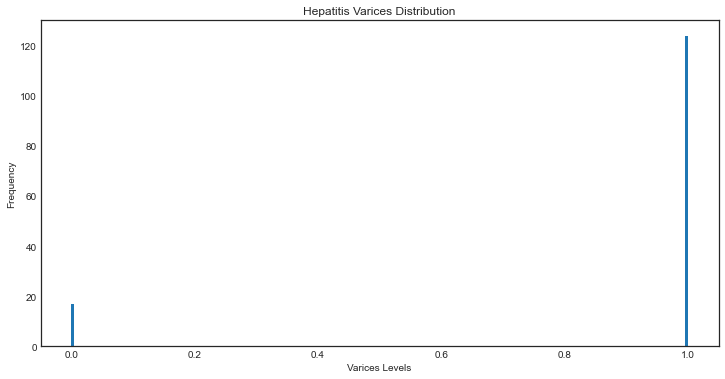

Column index: 13


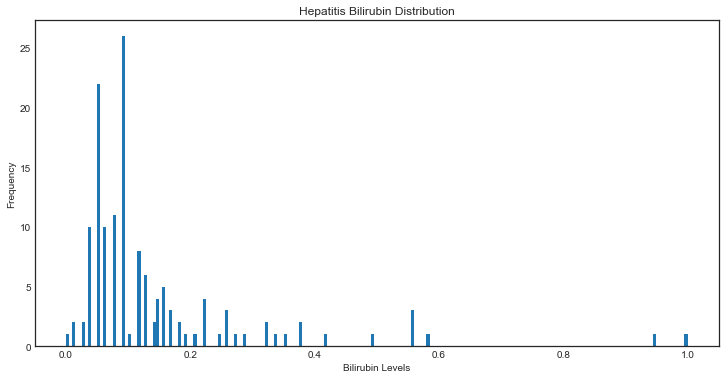

Column index: 14


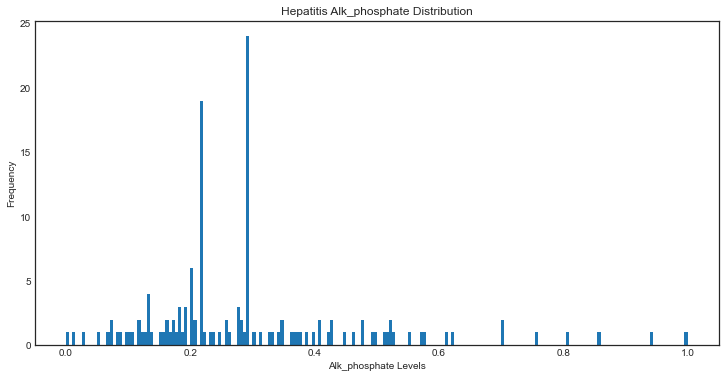

Column index: 15


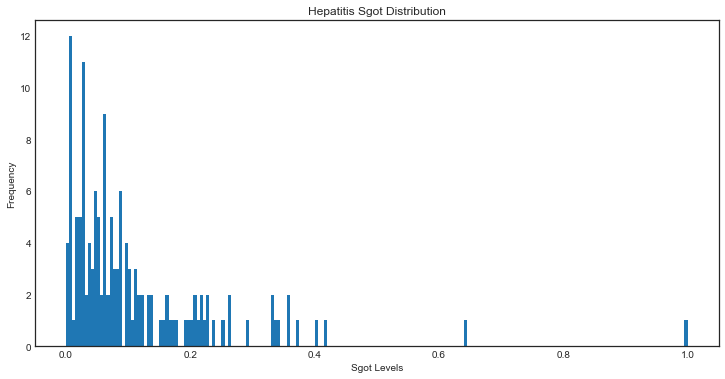

Column index: 16


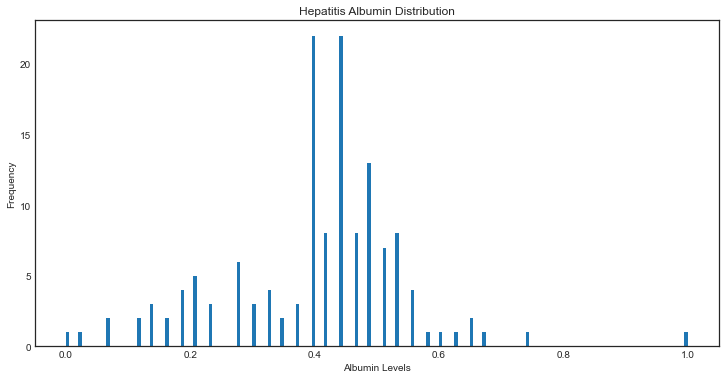

Column index: 17


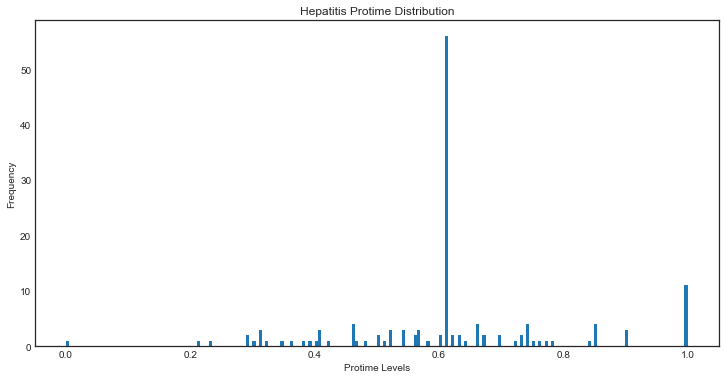

Column index: 18


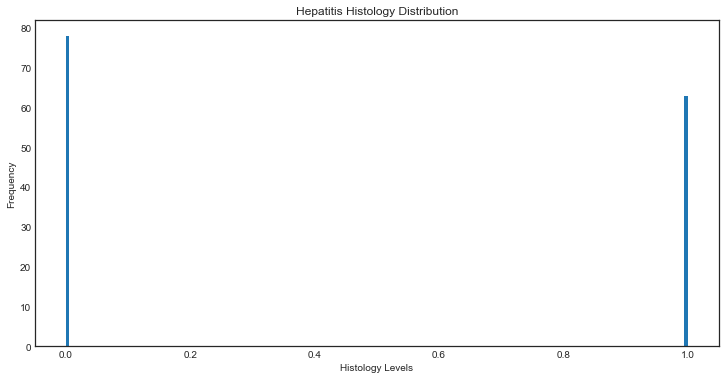

Column index: 19


In [12]:
# We vary this parameter to see which # of bins gives us a goood distribution
# of the features
nBinsH = 200
# getting the feature names
featureNamesH = df_h.columns

# Distribution of other features of Hepatitis
plt.style.use('seaborn-white')
for curFeatureH in range(1, Xh.shape[1]):
  plt.figure(figsize=(10,5))
  plt.hist(XhV[:, curFeatureH], nBinsH)
  plt.tight_layout()
  plt.xlabel(featureNamesH[curFeatureH-1].capitalize() + " Levels")
  plt.ylabel("Frequency")
  plt.title("Hepatitis " + str(featureNamesH[curFeatureH-1].capitalize()) + " Distribution")
  plt.show()
  print(f"Column index: {curFeatureH}")

**Hepatitis Summary**

In [13]:
print("Number of samples: " + str(Xh.shape[0]) 
+ "\nNumber of features (incl. bias): " + str(Xh.shape[1]))

Number of samples: 141
Number of features (incl. bias): 20



**Visualizing data set: Bankruptcy**



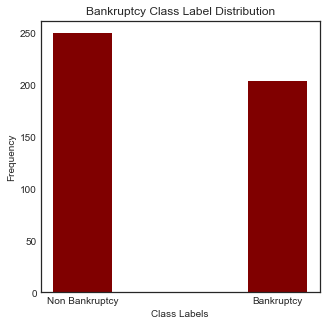

In [14]:
# Distribution of Non Bankruptcy vs Bankruptcy
# We are assuming class label 0 = Non Bankruptcy and class label 1 = Bankruptcy
bankruptcyCount = np.count_nonzero(Yb)
nonBankruptcyCount = arr_b.shape[0] - bankruptcyCount
classLabelsB = ["Non Bankruptcy", "Bankruptcy"]
classLabelCountB = [nonBankruptcyCount, bankruptcyCount]
plt.figure(figsize=(5,5))
plt.bar(classLabelsB, classLabelCountB, color='maroon', width=0.3)
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.title("Bankruptcy Class Label Distribution")
plt.show()

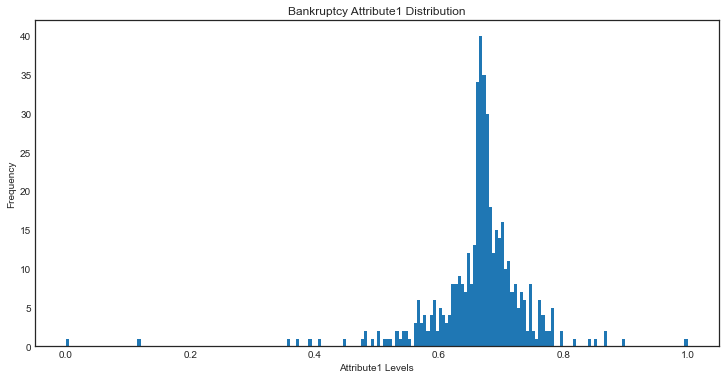

Column index: 1


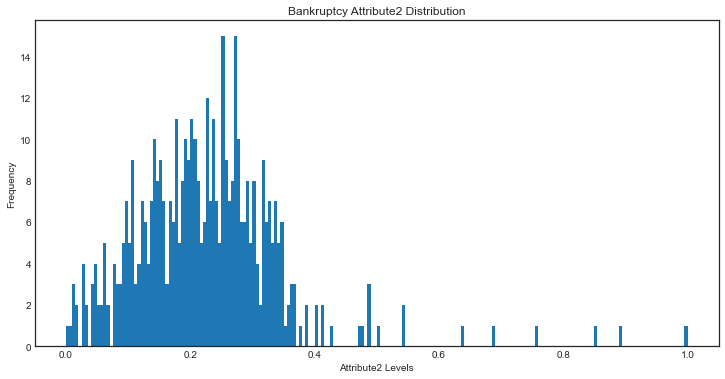

Column index: 2


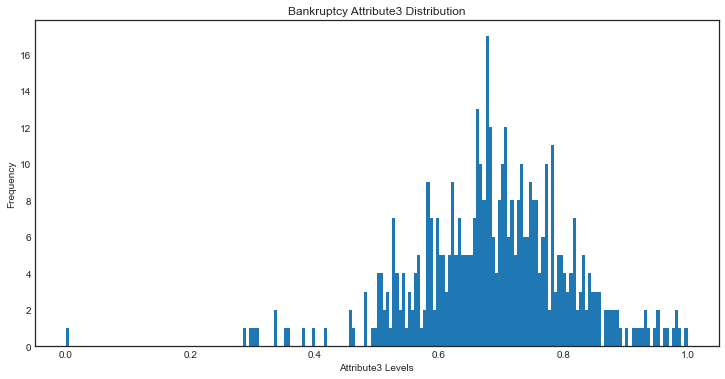

Column index: 3


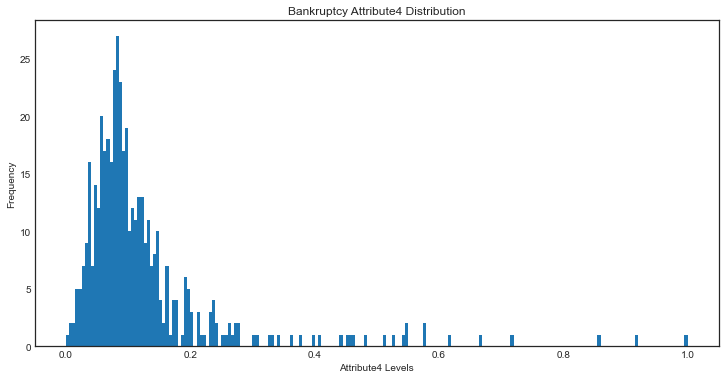

Column index: 4


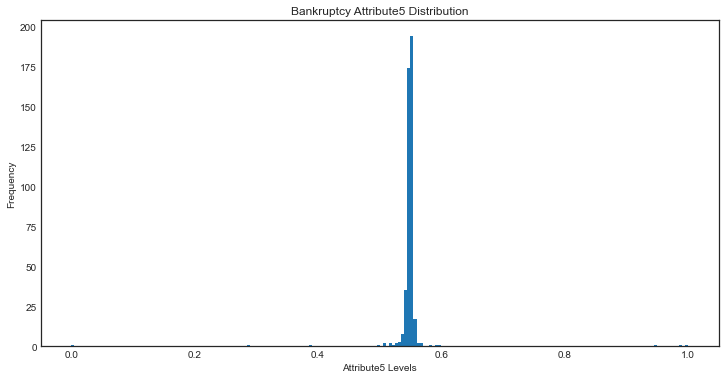

Column index: 5


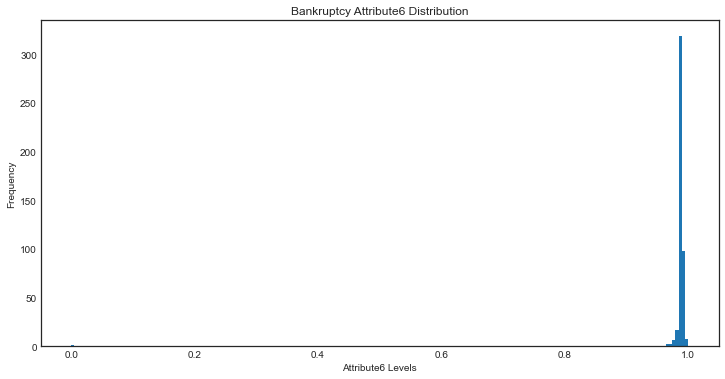

Column index: 6


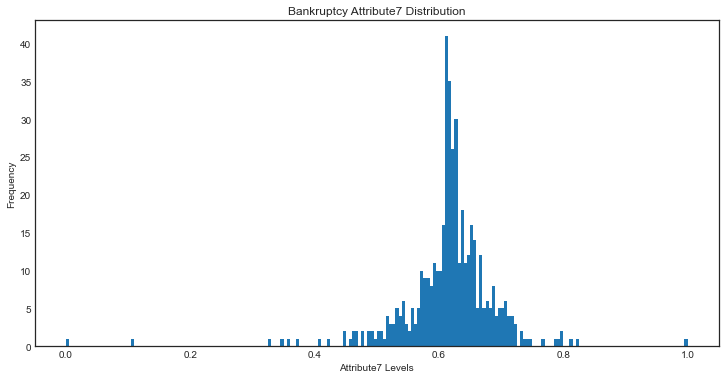

Column index: 7


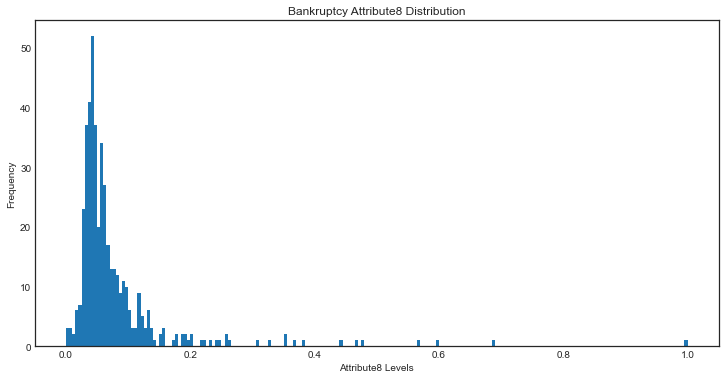

Column index: 8


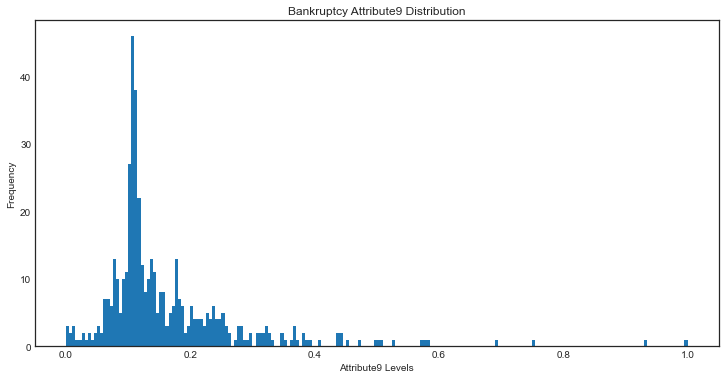

Column index: 9


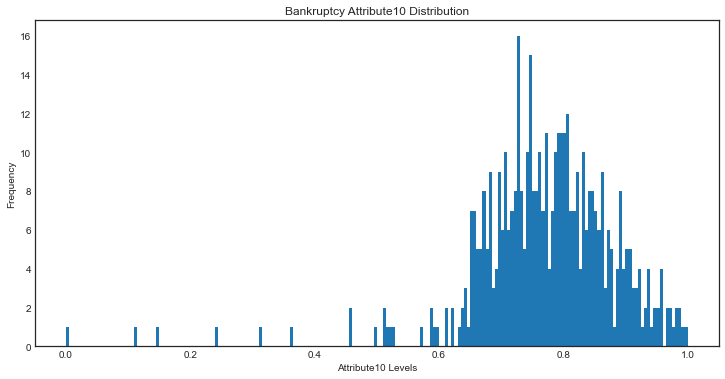

Column index: 10


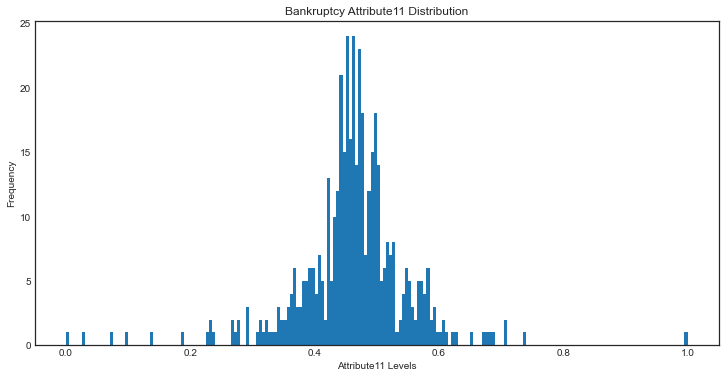

Column index: 11


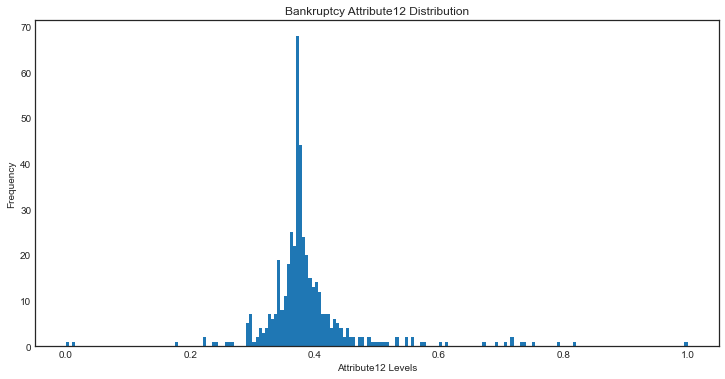

Column index: 12


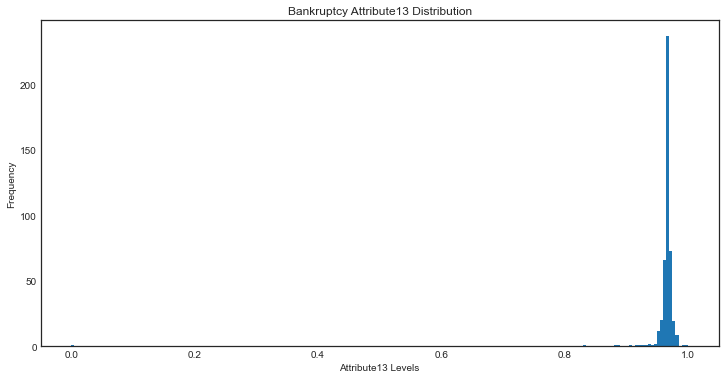

Column index: 13


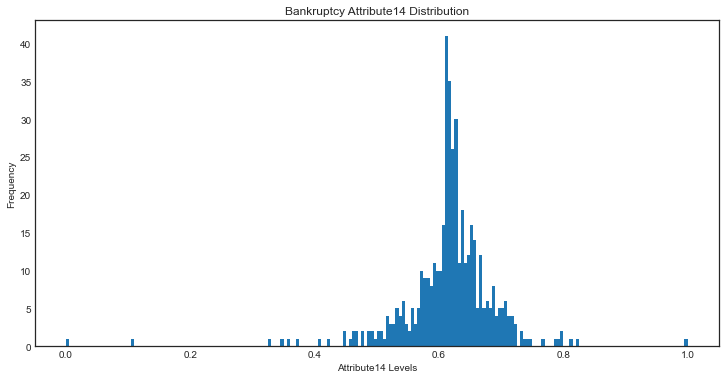

Column index: 14


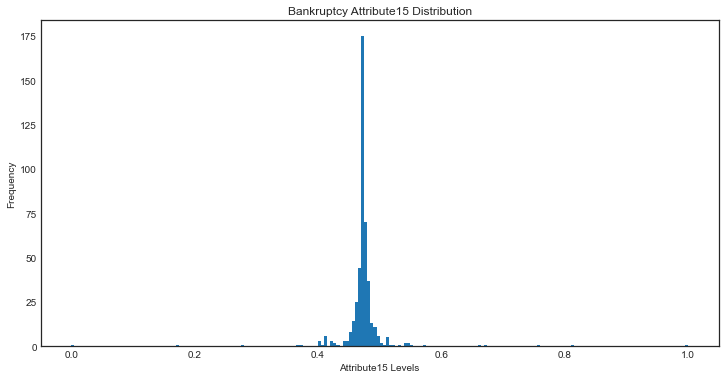

Column index: 15


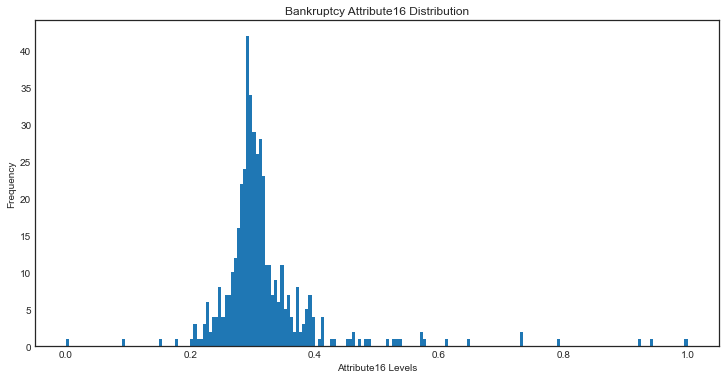

Column index: 16


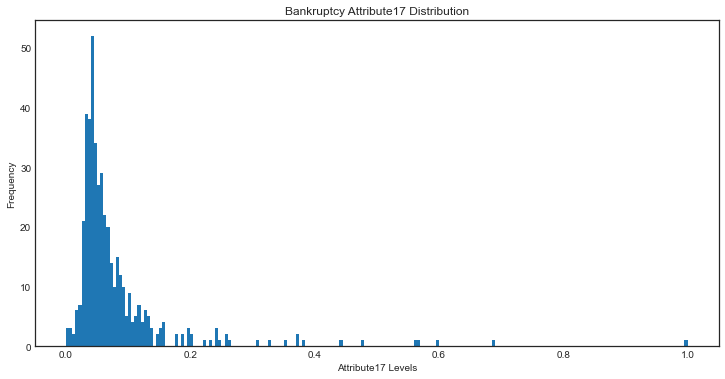

Column index: 17


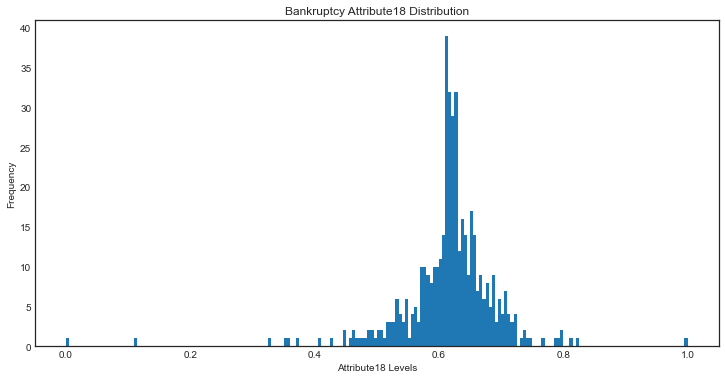

Column index: 18


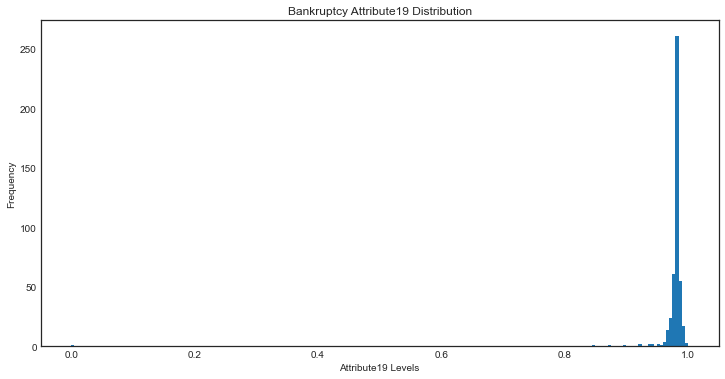

Column index: 19


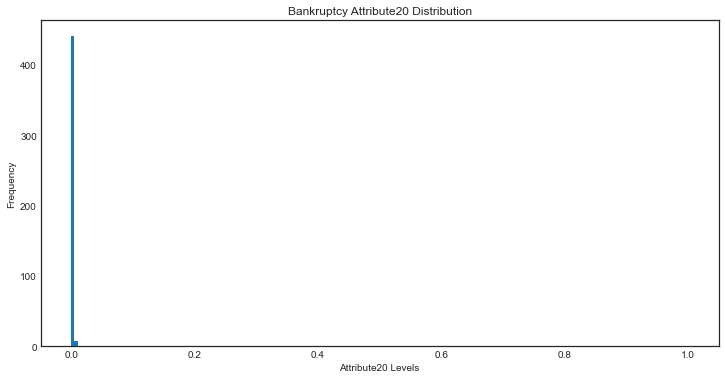

Column index: 20


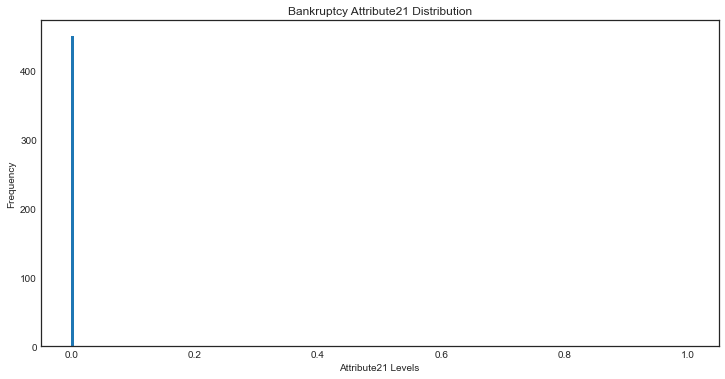

Column index: 21


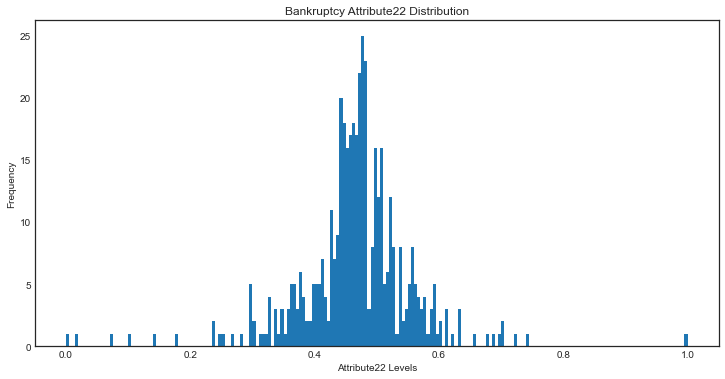

Column index: 22


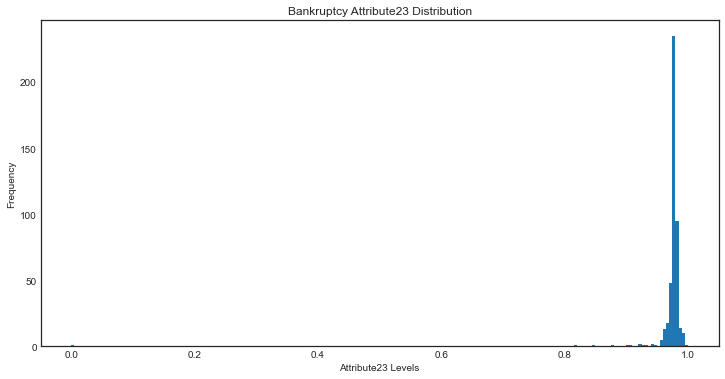

Column index: 23


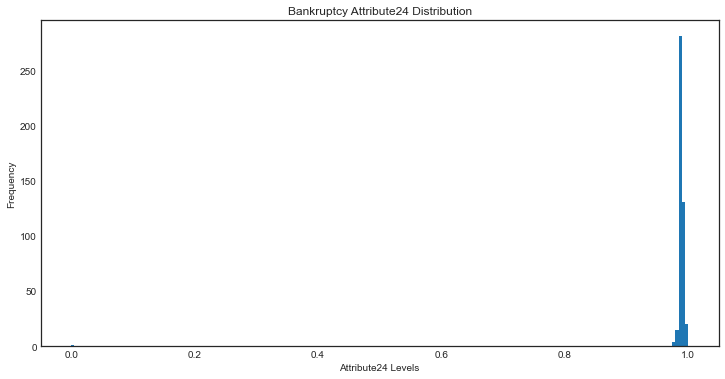

Column index: 24


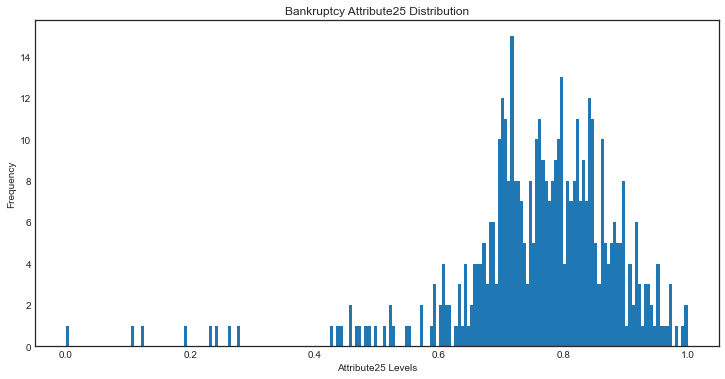

Column index: 25


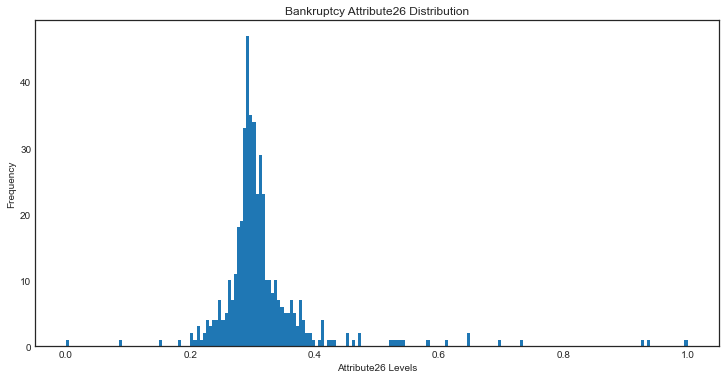

Column index: 26


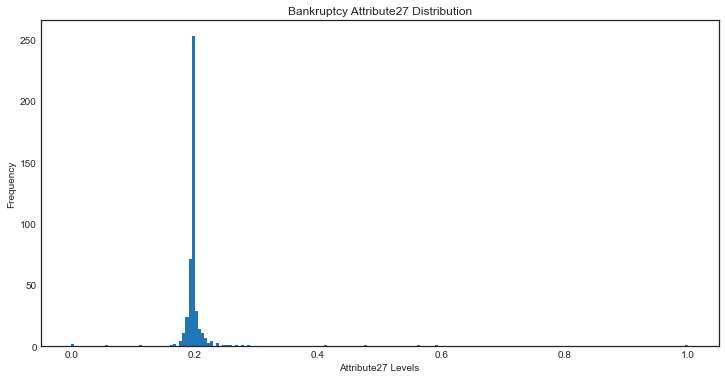

Column index: 27


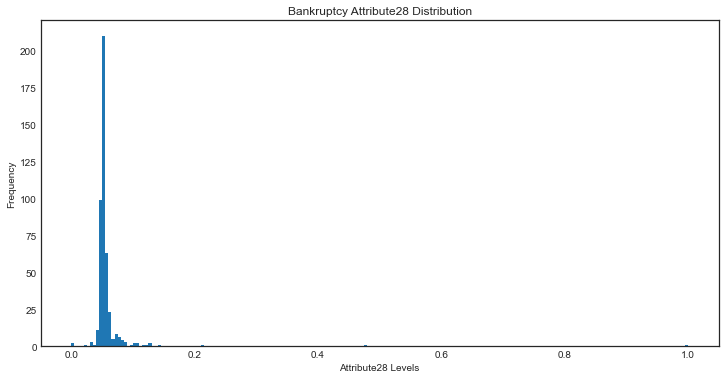

Column index: 28


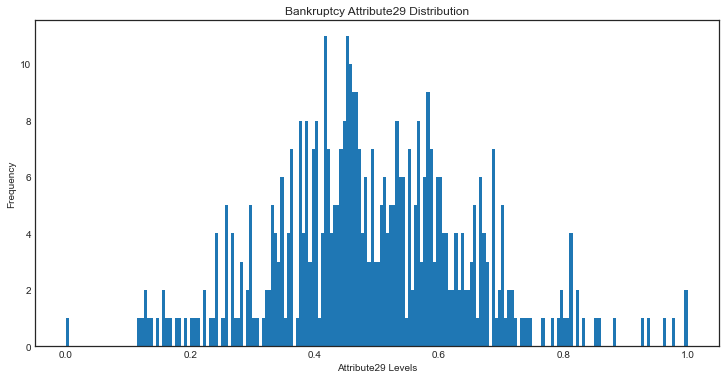

Column index: 29


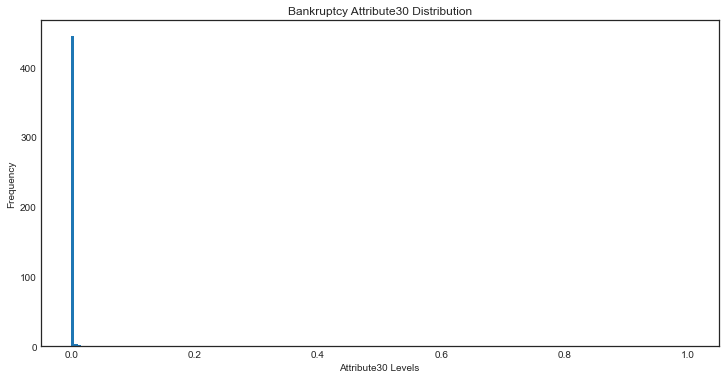

Column index: 30


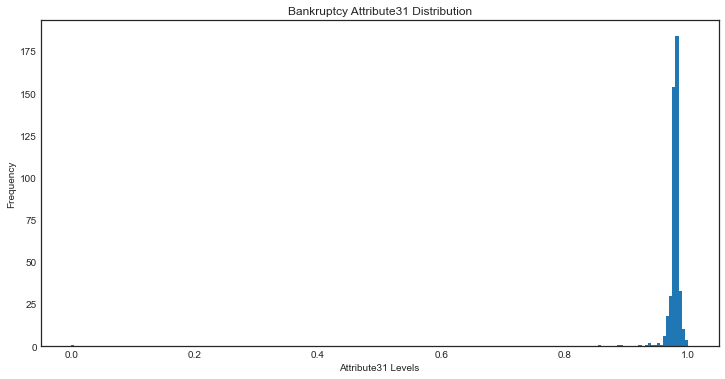

Column index: 31


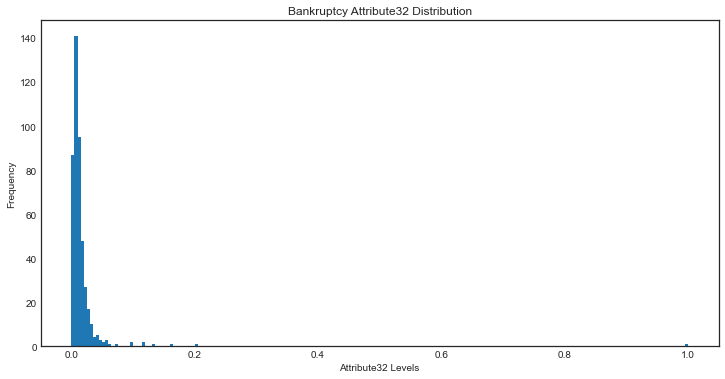

Column index: 32


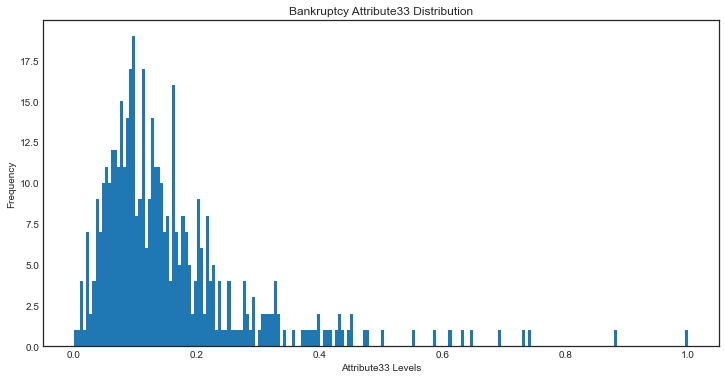

Column index: 33


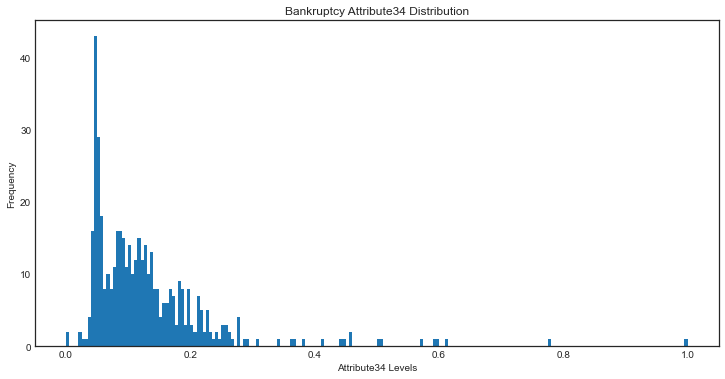

Column index: 34


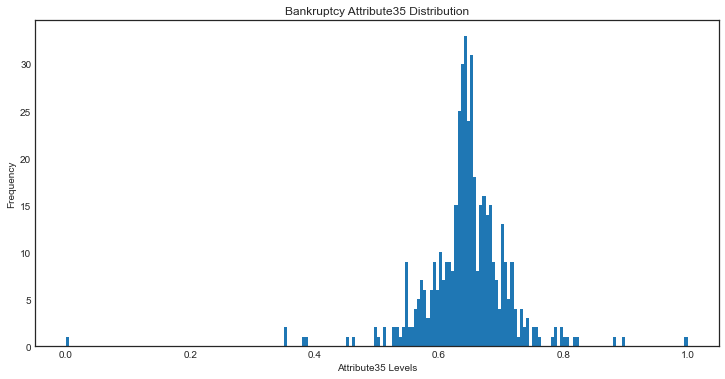

Column index: 35


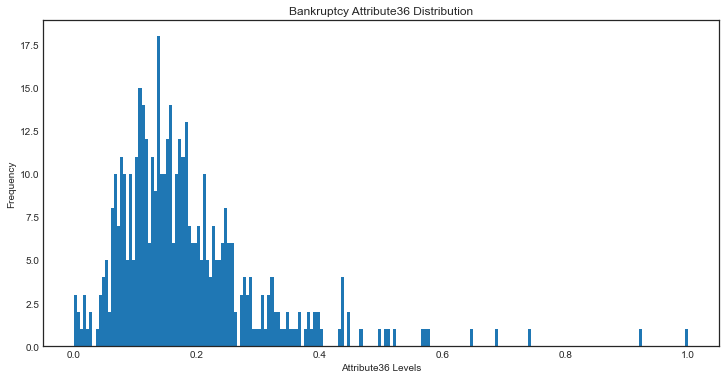

Column index: 36


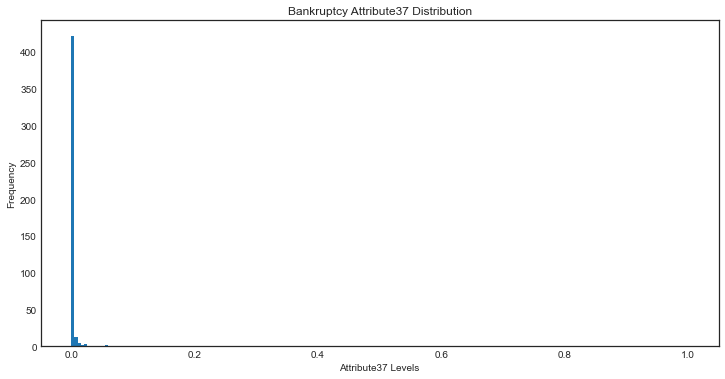

Column index: 37


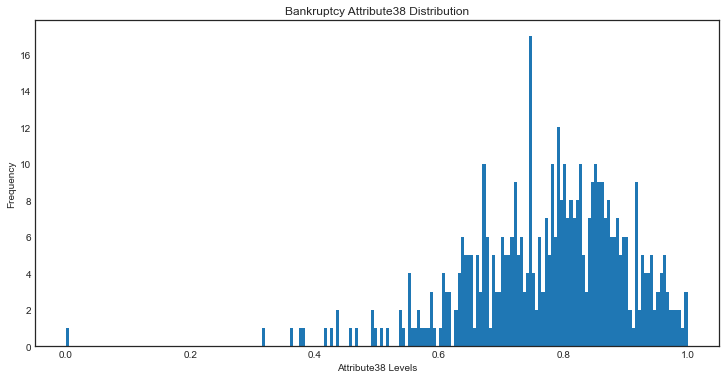

Column index: 38


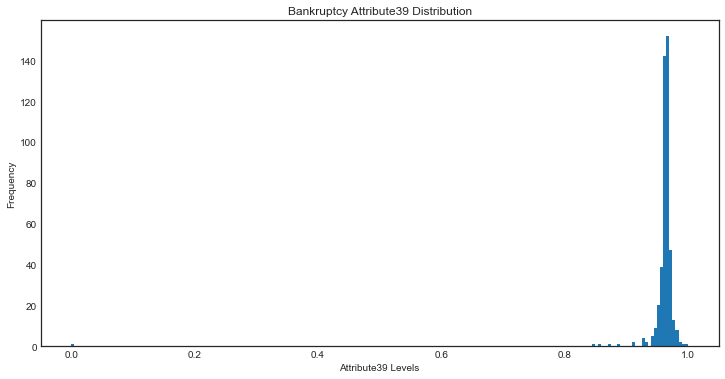

Column index: 39


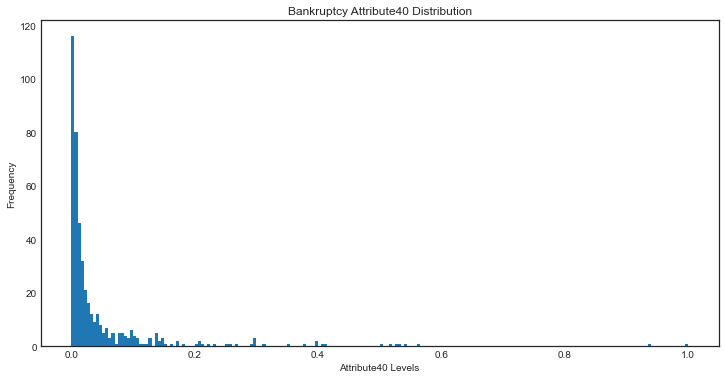

Column index: 40


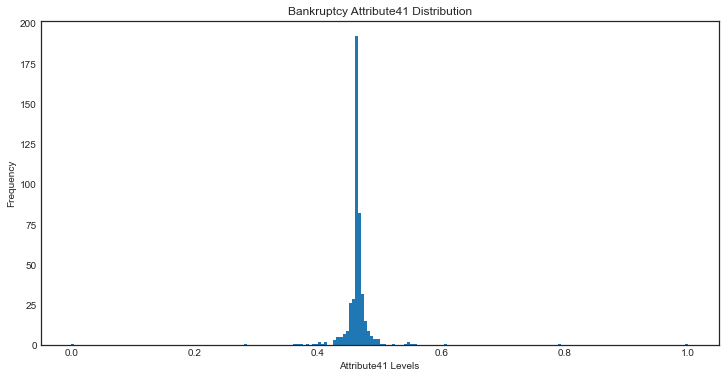

Column index: 41


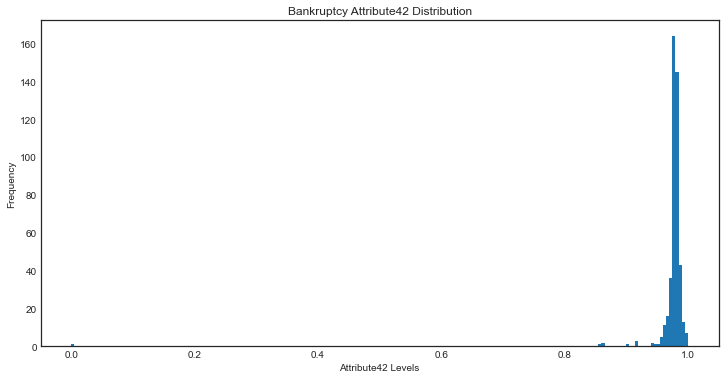

Column index: 42


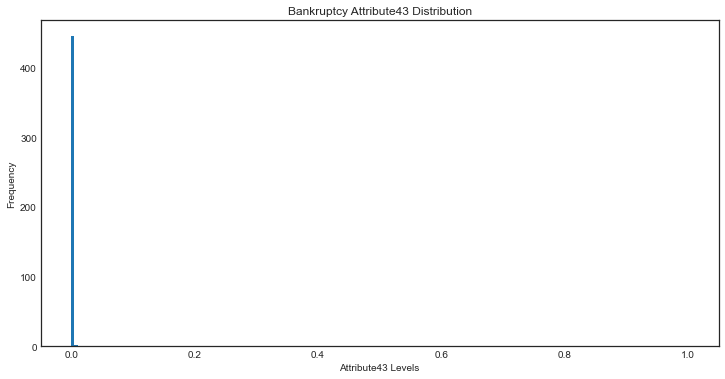

Column index: 43


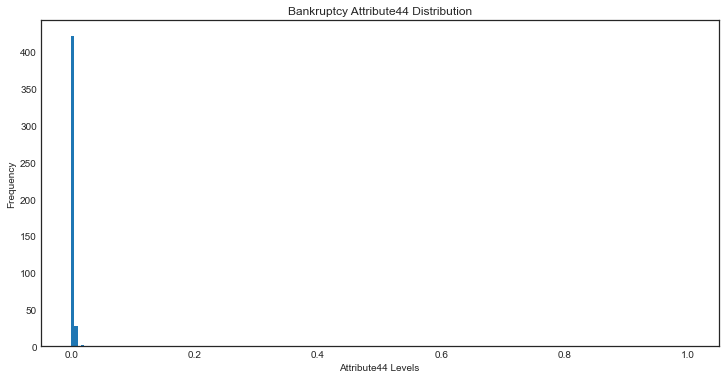

Column index: 44


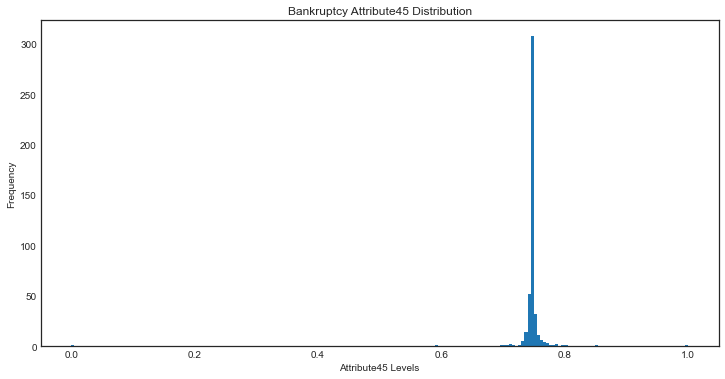

Column index: 45


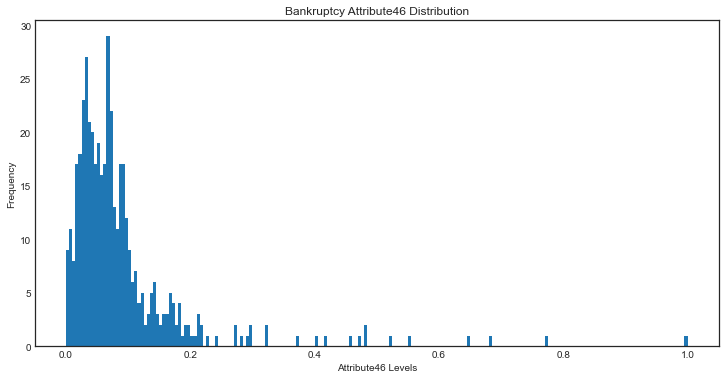

Column index: 46


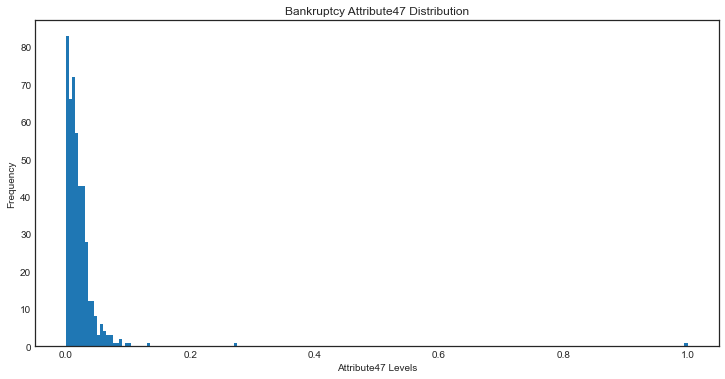

Column index: 47


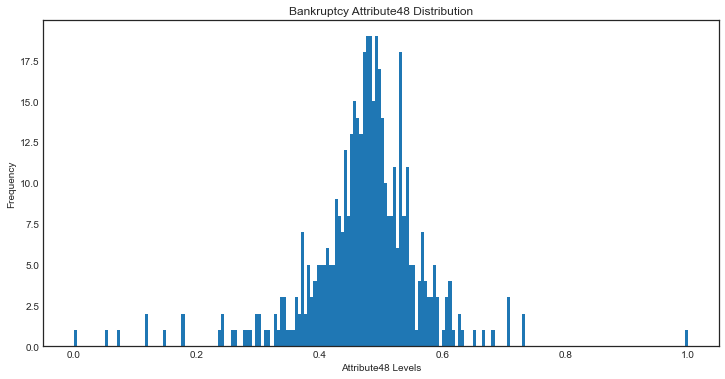

Column index: 48


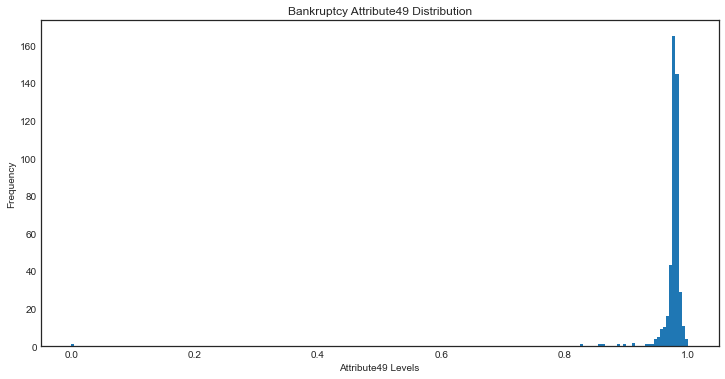

Column index: 49


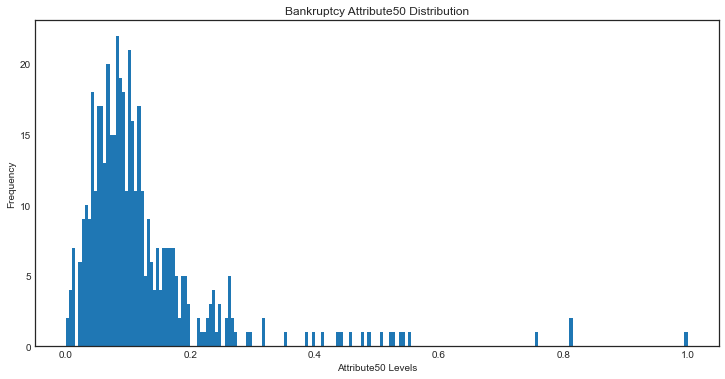

Column index: 50


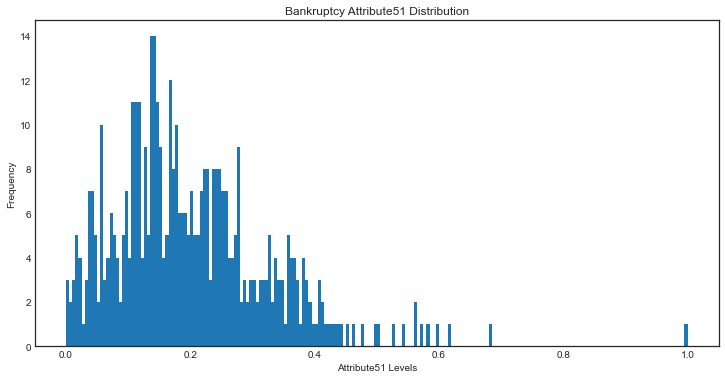

Column index: 51


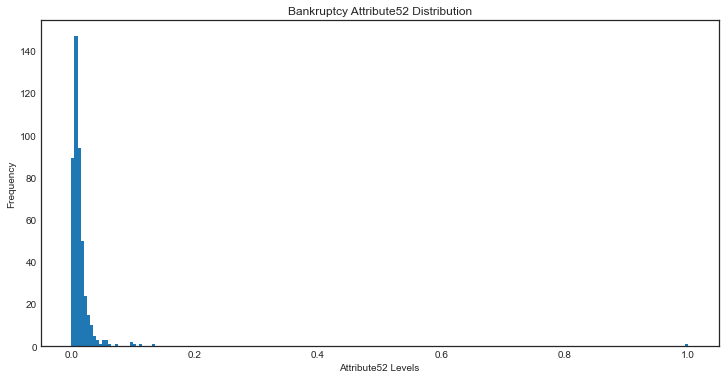

Column index: 52


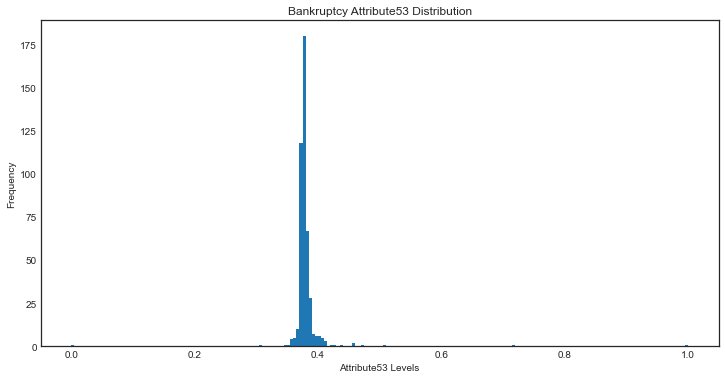

Column index: 53


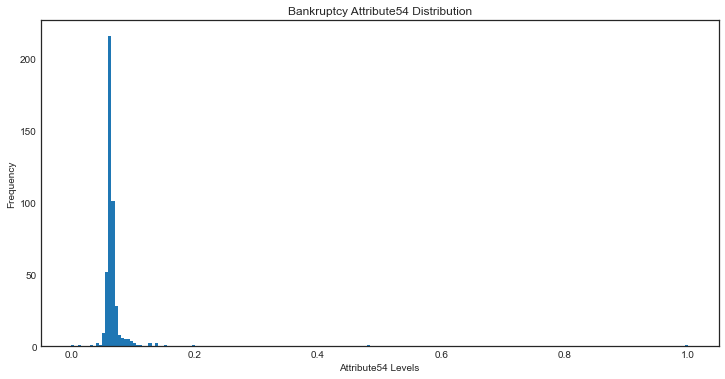

Column index: 54


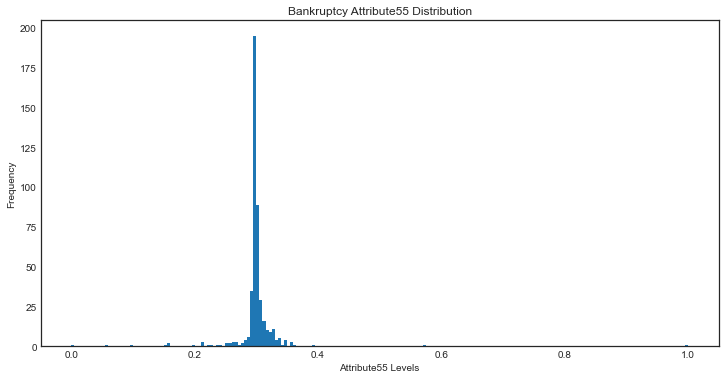

Column index: 55


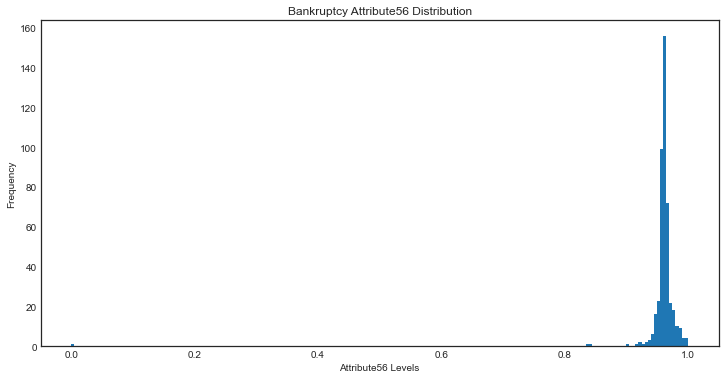

Column index: 56


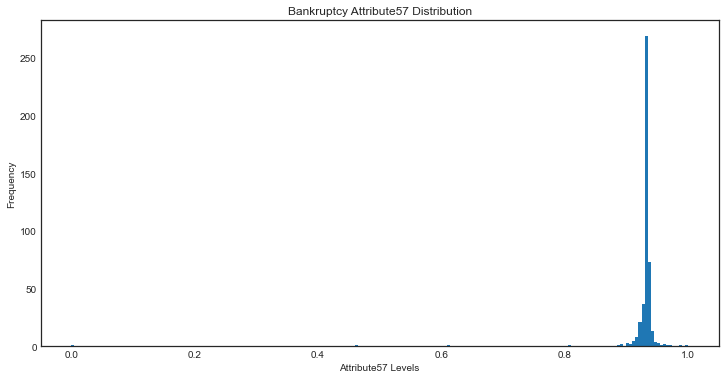

Column index: 57


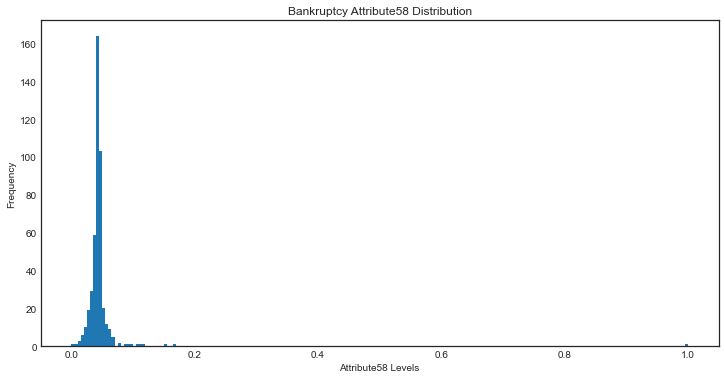

Column index: 58


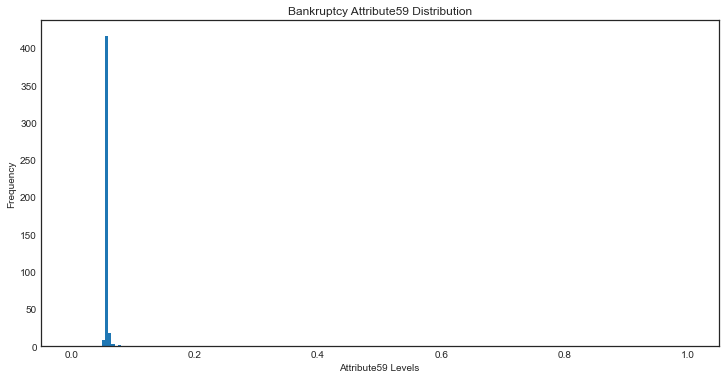

Column index: 59


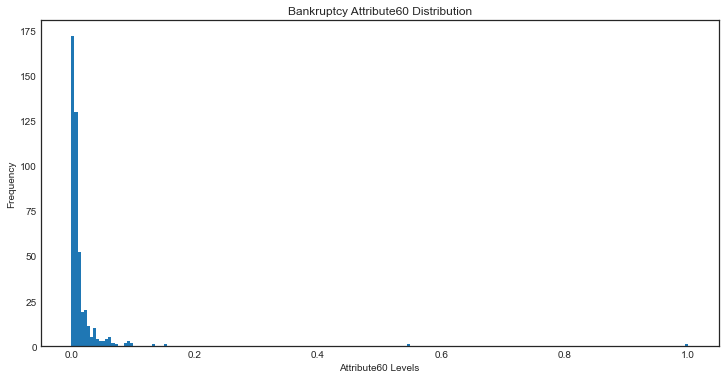

Column index: 60


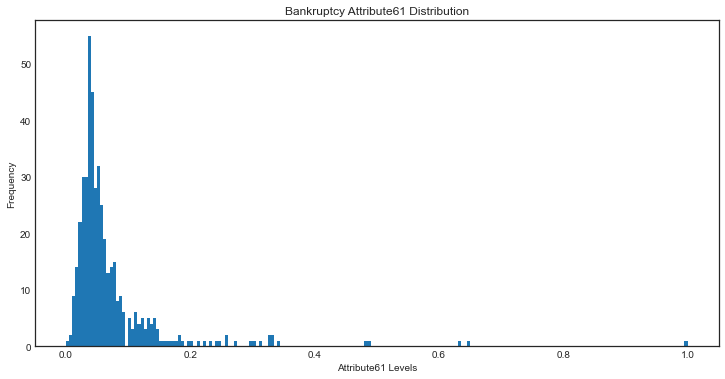

Column index: 61


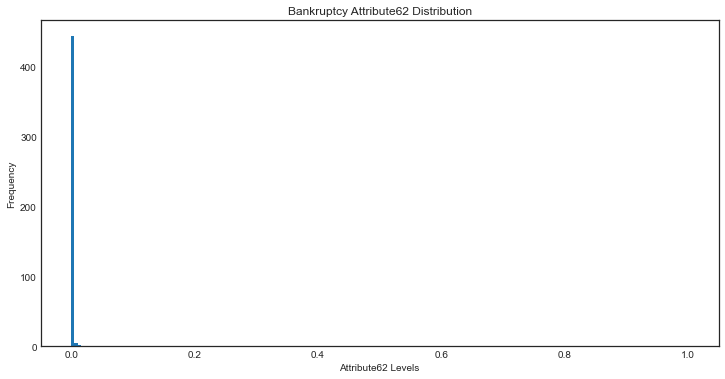

Column index: 62


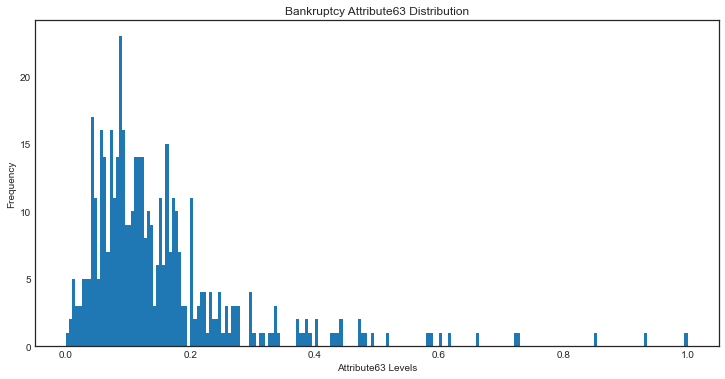

Column index: 63


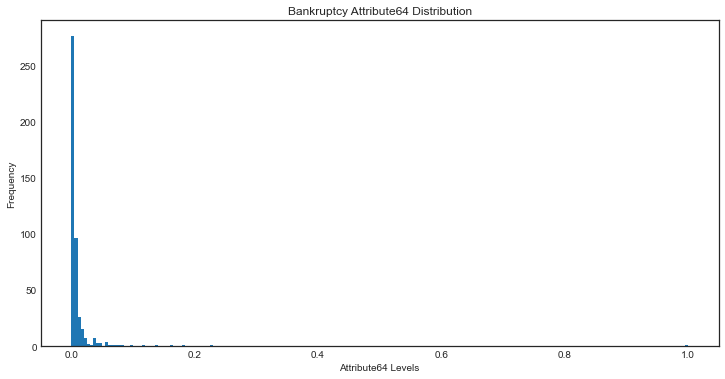

Column index: 64


In [15]:
# We vary this parameter to see which # of bins gives us a goood distribution
# of the features
nBinsB = 200
# getting the feature names
featureNamesB = df_b.columns

# Distribution of other features of Hepatitis
plt.style.use('seaborn-white')
for curFeatureB in range(1, Xb.shape[1]):
  plt.figure(figsize=(10,5))
  plt.hist(XbV[:, curFeatureB], nBinsB)
  plt.tight_layout()
  plt.xlabel(featureNamesB[curFeatureB-1].capitalize() + " Levels")
  plt.ylabel("Frequency")
  plt.title("Bankruptcy " + str(featureNamesB[curFeatureB-1].capitalize()) + " Distribution")
  plt.show()
  print(f"Column index: {curFeatureB}")

**Bankruptcy Summary**

In [16]:
print("Number of samples: " + str(Xb.shape[0]) 
+ "\nNumber of features (incl. bias): " + str(Xb.shape[1]))

Number of samples: 452
Number of features (incl. bias): 65


**Data Preprocessing Functions**

Removing Features

In [17]:
# Removing features in our data sets
# Takes in a list of column indices for dynamic removal
def removeFeature(X, columns):
  tmp = np.delete(X, columns, axis=1)
  print(tmp.shape)
  return tmp

In [18]:
# These are the column indexes determined for removal after observing the feature distributions for both data sets
columnsH = np.array([18])
Xhr = removeFeature(Xh, columnsH)
columnsB = np.array([ 20, 21, 24, 43, 44,45, 59, 62])
Xbr = removeFeature(Xb, columnsB)

(141, 19)
(452, 57)


Checking for Linearly Independent Columns


In [19]:
# Determine if the matrix is full rank or not
def isFullRank(X):
  rank = np.linalg.matrix_rank(X)
  if rank == X.shape[1]:
    return True
  else:
    return False

Changing the Order and Dimentionality of the Data sets

In [20]:
# WARNING: should only call this function once!! and X has to be 1st order
def changeModelOrder(model_order, X):
  # If model order is greater than one do something about the matrix
  Xtmp = X
  if model_order > 1:
    for k in range(2,model_order+1):
      temp = Xtmp[:,1:Xtmp.shape[1]]**k
      Xtmp =  np.concatenate((Xtmp,temp),axis=1)
    print(f"The order of the linear model is now: {model_order}")
    return Xtmp   
  # If model order = 1 or less we set model to original model
  else:
    print(f"The order of the linear model didn't change: {model_order}")
    return Xtmp

Feature Standardization

In [21]:
# Feature Standardization of data set
def featureStandardization(X, mean=None, std=None, flag=True):
    # If we are just standardizing our training set 
    if flag:
      mean = np.mean(X[:,1:],axis=0)
      std = np.std(X[:, 1:],axis=0)
      for i in range(0, X.shape[0]):
        X[i, 1:] = (X[i, 1:] - mean)/std
      return X, mean, std
    # If we have explicit values for mean and std for which we would like to
    # Use these values to standardize our data set
    else:
      for i in range(0, X.shape[0]):
        X[i, 1:] = (X[i, 1:] - mean)/std
      return X


**Logistic Regression Class**

In [22]:
class LogisticRegression:

  #
  # Constructor 
  #

  def __init__(self, numFeatures):
    # This will store the predicted labels at run time but at init time
    self.w = np.zeros((numFeatures,1))
    # self.globalAlpha = 0
    self.predLabels = None
    print("Classifier initializations successfully completed!")

  #
  # Behaviours
  #

  # Computes the sigmoid of a
  @staticmethod
  def _sigmoid(a):
    sig = 1/(1+np.exp(-a))
    return sig

  # Computes the vectorized gradient for logistic regression
  @staticmethod
  def _gradient(self, w, X, Y):
    grad = (np.matmul(np.transpose(X),(self._sigmoid(np.matmul(X, w)) - Y))/Y.shape[0])
    return grad

  # Fitting our model to find optimized weight matrix
  def fit(self, learning_rate, stop_err, X, Y, decay_rate):
    curErrVector = [] # list holds a vector of decreasing errors for plotting later
    numIterations = 0 # Iteration index
    curErr = 666 # Arbitrary number larger than err_tol
    w = np.zeros((X.shape[1],1)) 
#     w = self.w # weight vector from constructor 
    # Gradient descent algorithm
    while curErr >= stop_err:
      alpha = learning_rate/(numIterations*decay_rate + 1) # Learning rate decreases every iteration
      grad = self._gradient(self, w, X, Y)
      w_new = w - alpha*grad
      curErr = np.linalg.norm(w_new - w, 2)
#       curErr = np.linalg.norm(grad,2)
      curErrVector.append(curErr)
      # print(f"Current error: {curErr}")
      w = w_new
      numIterations += 1

    print(f"Current error: {curErr}")
    print("\nGradient Descent converged successfully in " + str(numIterations) + " iterations.")
    self.w = w
    # self.globalAlpha = alpha
    return w, numIterations,curErrVector

  # Fitting our model to find optimized weight matrix using Conjugate Gradient
  def fit_CG(self, learning_rate, stop_err, X, Y, weights=None):

    # Setting up the weights that will be used 
    w = None
    if weights == None:
      w = np.zeros((X.shape[1],1))
    else:
      w = weights
  
    num_iter = 0 # Total number of iterations
    abs_err = 1000000 # Arbitrary number larger than err_tol
    rel_err = 1000000000000 # Arbitrary number much larger than err_tol
    
    # Conjugate Gradient algorithm
    count = 0;
    # decay_rate = 0.000001
    decay_rate = 0.0000
    grad = self._gradient(self, w, X, Y)
    s = -grad
    # while abs_err >= err_tol and rel_err >= err_tol/1000000:
    while abs_err >= stop_err:
      if count == len(w):
        s = -grad
        count = 0
        # print(f"Current error: {abs_err}")  #To print before every restart
        # print(f"Relative error: {rel_err}") #To print before every restart
        rel_err = 1000000000000 # Arbitrary number much larger than err_tol
        # print("Conjugate Gradient failed to converge in m iterations, restarting the algorithm...")
        
      alpha = learning_rate/(decay_rate*num_iter + 1) # Learning rate decreases every iteration
      w_new = w + alpha*s
      grad_new = self._gradient(self, w_new, X, Y)
      beta = np.matmul(np.transpose(grad_new-grad),grad_new)/(np.linalg.norm(grad,2)**2)
      s = -grad_new+beta*s
    
      if count > 0:
        temp = abs_err - np.linalg.norm(grad_new,2)
        if temp > 0:
          # rel_err = np.abs(abs_err - np.linalg.norm(grad_new,2))
          rel_err = temp
        # print(f"Relative error: {temp}")  #To print at every iteration
        
      abs_err = np.linalg.norm(grad_new,2)
      # print(f"Current error: {abs_err}")  #To print at every iteration
      grad = grad_new
      w = w_new
      count += 1
      num_iter += 1
    
    # We return weights vector after fitting it to our data set 
    print("\nConjugate gradient converged successfully in " + str(num_iter) + " total iterations.")
    print(f"Current error: {abs_err}")
    print(f"Relative error: {rel_err}")
    return w, numIterations 

  # Predicting our labels with our optimized weight matrix
  def predict(self, X):

    # List to contain the predicted labels
    predictedLabels = []
    # X = nxm & W = mx1
    tmp = np.matmul(X, self.w)
    probX = self._sigmoid(tmp)

    # Predicting the labels
    for curProb in probX:
      curProbComplement = 1 - curProb
      if curProb > curProbComplement:
        predictedLabels.append(1)
      else:
        predictedLabels.append(0)

    # Setting the instance's predicted labels for future model accuracy cals
    self.predLabels = predictedLabels
    return predictedLabels

  # Accuracy function
  def accu_eval(self, Y):
    correctCount = 0
    for i in range(0, Y.shape[0]):
      if Y[i] == self.predLabels[i]:
        correctCount += 1

    accuracy = (correctCount/Y.shape[0])*100
    return accuracy

**K-Fold Cross Validation Class**

In [23]:
class K_CrossValidation:
  
  #
  # Constructor
  #

  def __init__(self, Xin, Yin, numFolds=10):
    # Initializing variables
    self._X = Xin
    self._Y = Yin
    self._kFolds = numFolds
    if self._X.size == 0 and self._Y.size == 0 and self._kFolds == None:
      print("Error: K-Fold class initializations unsuccessful!\n")
    else:
      print("K-Fold class initializations successfully completed!\n")
  
  # Standardize the features of X using their respective mean and standard deviation 
  # (Useful when feature has a Gaussian distribution)
  @staticmethod
  def _featureStandardization(X, mean=None, std=None, flag=True):
    # If we are just standardizing our training set 
    if flag:
      mean = np.mean(X[:,1:],axis=0)
      std = np.std(X[:, 1:],axis=0)
      for i in range(0, X.shape[0]):
        X[i, 1:] = (X[i, 1:] - mean)/std
      return X, mean, std
    # If we have explicit values for mean and std for which we would like to
    # Use these values to standardize our data set
    else:
      for i in range(0, X.shape[0]):
        X[i, 1:] = (X[i, 1:] - mean)/std
      return X

  
  # Splits data into training, validation, and test
  def splitTrainValTest(self, trainPercentage):

    # To store the different folds of our data
    # To store the labels associated with each of the data folds
    X_Train_Folds = []
    Y_Train_Folds = []
    # Find the percentage of the training size from 0 to training size
    # WARNING: trainPercentage should be a decimal form of percentage
    numTrainSamples = ma.floor(trainPercentage*self._X.shape[0])   
    # Splitting data into test and trainning
    X_Train = self._X[0:numTrainSamples, :]
    Y_Train = self._Y[0:numTrainSamples, :]
    X_Test = self._X[numTrainSamples:self._X.shape[0], :]
    Y_Test = self._Y[numTrainSamples:self._X.shape[0], :]
    # Number of folds - set to 10 by default
    k = self._kFolds
    # Find out roughly how many samples in each fold
    remainder = X_Train.shape[0] % k
    numSamplesPerFold = ma.floor(X_Train.shape[0]/k)
    print(f"Number of samples per fold: {numSamplesPerFold}")
    print(f"Remaining samples after dividing by {k}: {remainder}")

    # Splitting training set into 10 equal folds or 10 folds with some folds different size
    if (remainder == 0):
      for i in range(0, k):
        X_Train_Folds.append(X_Train[i*numSamplesPerFold: (i*numSamplesPerFold + numSamplesPerFold),:])
        Y_Train_Folds.append(Y_Train[i*numSamplesPerFold: (i*numSamplesPerFold + numSamplesPerFold),:])
    else:
      for i in range(0, k):
        # This is for the case when remainder isnt 0: -> There are samples leftover from trying to 
        # divide by k
        # The first few however many sets will each contain an extra sample 
        # To spread the extra samples out roughly evenly
        if (i <= (remainder - 1)):
          if (i == 0):
            X_Train_Folds.append(X_Train[i*numSamplesPerFold: (i*numSamplesPerFold + numSamplesPerFold + 1),:])
            Y_Train_Folds.append(Y_Train[i*numSamplesPerFold: (i*numSamplesPerFold + numSamplesPerFold + 1),:])
          else:
            X_Train_Folds.append(X_Train[i*numSamplesPerFold + 1: (i*numSamplesPerFold + numSamplesPerFold + 2),:])
            Y_Train_Folds.append(Y_Train[i*numSamplesPerFold + 1: (i*numSamplesPerFold + numSamplesPerFold + 2),:])
        else:
          if (i == remainder):
            X_Train_Folds.append(X_Train[i*numSamplesPerFold + 1: (i*numSamplesPerFold + numSamplesPerFold + 1),:])
            Y_Train_Folds.append(Y_Train[i*numSamplesPerFold + 1: (i*numSamplesPerFold + numSamplesPerFold + 1),:])
          else:
            X_Train_Folds.append(X_Train[i*numSamplesPerFold: (i*numSamplesPerFold + numSamplesPerFold),:])
            Y_Train_Folds.append(Y_Train[i*numSamplesPerFold: (i*numSamplesPerFold + numSamplesPerFold),:])

    # The data sets are split into training and testing: X_Train & X_Test
    # Then the X_Train_Folds = X_Train split into 10 equal folds stored as a list
    # X_Train_Folds is a list and X_Train is a big numpy array
    print("Finished splitting the data into training and testing porportions!\n")
    return X_Train_Folds, Y_Train_Folds, X_Train, Y_Train, X_Test, Y_Test

  # K-Fold Cross Validation function
  def runKFoldCrossValidation(self, X_Folds, Y_Folds, trainingSetSize, learning_rate, stop_error, lr, decay_rate, STD=False):

    # Dictionary to store each fold's accuracy
    # (Key: Validation Set #  Value: accuracy) - form of our data
    foldAccuracies = {}
    fold_iteration = []
    k = self._kFolds # Fold number
    errorSum = 0 # To keep track of each fold's/model's error

    # Looping through the folds to train and validate
    for validationNum in range(0, k):
      
      print(f"Starting fold {validationNum + 1} simulation....\n")
      # Store the validation set x and y in some temp variable for later use
      X_ValidationSet = X_Folds[validationNum]
      Y_ValidationSet = Y_Folds[validationNum]
      # Creating a temp np array for combining all the training ones into one big array
      X_Train = np.zeros((trainingSetSize-X_ValidationSet.shape[0], X_ValidationSet.shape[1]))
      Y_Train = np.zeros((trainingSetSize-Y_ValidationSet.shape[0], Y_ValidationSet.shape[1]))
      bLimit = 0
      uLimit = 0

      # Combining all the training sets into one big numpy array for training  
      for i in range(0, k):
        if (i == validationNum):
          print(f"Skipping validation set {i + 1}!")
          continue
        else:
          curFoldX = X_Folds[i]
          curFoldY = Y_Folds[i]
          uLimit += curFoldX.shape[0]
          X_Train[bLimit:uLimit,:] = curFoldX 
          Y_Train[bLimit:uLimit,:] = curFoldY
          bLimit += curFoldX.shape[0]
      
      # If user wants feature standardization
      if STD == True:
        # Feature Standardization for training fold
        X_Train, mean, std = self._featureStandardization(X_Train)
        # Feature Standardization for validation fold
        X_ValidationSet = self._featureStandardization(X_ValidationSet, mean=mean, std=std, flag=False)

      #flag=isConstLearningRate
      
      # Training  
      w, currentfold_iter,curErrVector = lr.fit(learning_rate, stop_error, X_Train, Y_Train, decay_rate)
      print(f"ZZZZZZZZZZ    size of X_train in each fit function: {X_Train.shape[0]} ")
      # Now to predict and find accuracy on the validation set
      lr.predict(X_ValidationSet)
      curFoldAccuracy = lr.accu_eval(Y_ValidationSet)
      # Adding it to the fold dictionary on each fold/model
      foldAccuracies[str(validationNum + 1)] = curFoldAccuracy
      fold_iteration.append(currentfold_iter)
      print(f"Accuracy on fold {validationNum + 1}: {foldAccuracies[str(validationNum + 1)]}% \n")
      errorSum = errorSum + (100 - curFoldAccuracy)
  
    # Returning k-fold accuracies stored in a dictionary
    errorAvg = (errorSum/k)
    print(f"Avg error for current model is: {errorAvg}%\n")
    return foldAccuracies, fold_iteration, curErrVector

**Experiments**

In [24]:
# This function will combine all the necessary function calls in order to run a 
# complete K-Fold Cross Validation with logistical regression classifier in a
# experiment define by the user
# X and Y are either our preprocessed data sets or not
# You can adjust the learning rate, stop error, training percentage, 
# Whether if you want to standardize your data or not STD = boolean
# If you want constant learning rate set the very last input to true
def runExperiment(X, Y, model_order, learning_rate, stop_error, trainingPercentage, decay_rate, STD=False):

  print("\nStep 0: Modifying the model order of our data set (choosing which features etc)\n")
  # WARNING: X has to be 1st order for the change model order to work properly
  # Can't go from ex: order 2 -> order 3 or vice versa
  # Can only go from order 1 -> 2 or 3 or 4... etc 
  X = changeModelOrder(model_order, X)
  print(f"Dataset model order used in this model simulation: {model_order}")

  print("\nSTEP 1\n")
  """Step 1: Initiate K Fold Cross Validation instance"""
  kFoldInstance = K_CrossValidation(X, Y)

  print("\nSTEP 2\n")
  """Step 2: Split our data into Training 
  (Validation set + training sets) & Testing"""
  X_Folds, Y_Folds, X_train, Y_train, X_test, Y_test = kFoldInstance.splitTrainValTest(trainingPercentage)
  print(f"The SIZE OF THE XTRAIN IS: {X_train.shape[0]}")
  print(f"The SIZE OF THE TOTAL IS: { X_test.shape[0] + X_train.shape[0]}")
#   print("\nSTEP 3\n")
  """Step 3: Initialize LR object"""
  lr = LogisticRegression(X.shape[1])

#   print("\nSTEP 4\n")
  """Step 4: Run K-Fold Cross Validation"""
  fA, fIter,curErrVector = kFoldInstance.runKFoldCrossValidation(X_Folds, Y_Folds, X_train.shape[0], learning_rate, stop_error, lr, decay_rate, STD=STD)
  accuracySum = 0
  for key in fA.keys():
    accuracySum = accuracySum + fA[key]
  avgAccuracy = accuracySum/len(fA.keys())
  print(f"The avagerage accuracy for this model is: {avgAccuracy} %")

#   print("\nSTEP 5\n")
  """Step 5: Displaying accuracy distributions for the 10 folds for this model"""
  plt.figure(figsize=(7,7))
  plt.bar(fA.keys(), fA.values(), 0.3, color='b')
  plt.xlabel('Fold Number')  
  plt.ylabel('Accuracy')
  plt.title("Accuracy Distribution 10-Fold of Current Model")
  plt.show()

  # For this step the X_train and all these returned should only be returned once
  # since for future models it will be using the same X_train and X_test
  print("\nSTEP 6\n")
  """Return the the training and testing folds that will be used later on"""
  print("Returning the training and the testing sets that will be used later on!")
  return X_train, Y_train, X_test, Y_test, fIter, avgAccuracy,lr
  

Testing above function: 

We used this cell below to this our functionality of our runExperiment function not part of Experiments

(452, 65)

Step 0: Modifying the model order of our data set (choosing which features etc)

The order of the linear model is now: 2
Dataset model order used in this model simulation: 2

STEP 1

K-Fold class initializations successfully completed!


STEP 2

Number of samples per fold: 35
Remaining samples after dividing by 10: 2
Finished splitting the data into training and testing porportions!

The SIZE OF THE XTRAIN IS: 352
The SIZE OF THE TOTAL IS: 452
Classifier initializations successfully completed!
Starting fold 1 simulation....

Skipping validation set 1!
Current error: 0.009951010984977679

Gradient Descent converged successfully in 117 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 316 
Accuracy on fold 1: 77.77777777777779% 

Starting fold 2 simulation....

Skipping validation set 2!
Current error: 0.009943682047916251

Gradient Descent converged successfully in 114 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 316 
Accuracy on fold 2: 69.44

<ipython-input-22-6c5a4669e219>:21: RuntimeWarning: overflow encountered in exp
  sig = 1/(1+np.exp(-a))


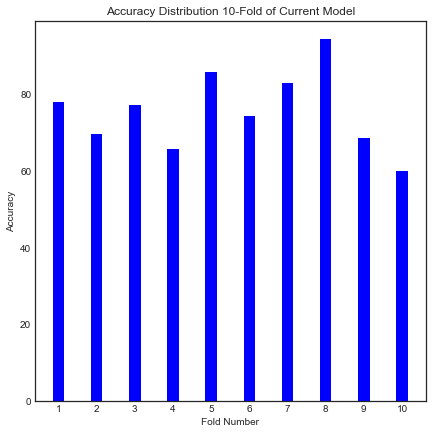


STEP 6

Returning the training and the testing sets that will be used later on!


In [25]:
# need to change the order of the data in order to see accuracy changes
# right now the Xh is 1st order but use the the changeOrder function to change it to higher 
# order 
# The STD is a boolean flag so one can decide whether to run the experiment with feature standardization or not
print(Xb.shape)
X_train, Y_train, X_test, Y_test,f_Iter,avgA, lr = runExperiment(Xb, Yb, 2, 0.8, 1e-2, 0.78, 0.01, STD=True)

**Final Model Selection**

In [26]:
# This function will run the model we determined to be the best one
# STD: remember to set the same boolean as when we used our standardization during 
# model selection
# you have to make sure the learning_rate, stop_error, and STD are the same values 
# as the ones you used in runExperiment for the model that was determined to be the best
def runModelSelected(X_train, Y_train, X_test, Y_test, learning_rate, stop_error, decay_rate,STD):
    
  # instantiating a lr object   
  lr = LogisticRegression(X_train.shape[1])
    
  # Feature standardization
  if STD == True:
    X_train, mean, std = featureStandardization(X_train)
    X_test = featureStandardization(X_test, mean=mean, std=std, flag=False)
    
  # Fitting and predicting
  w, iteration, curErrVector = lr.fit(learning_rate, stop_error, X_train, Y_train, decay_rate)
  lr.predict(X_test)
  modelAccuracy = lr.accu_eval(Y_test)
  print(f"Final model accuracy: {modelAccuracy}%")
  return curErrVector,iteration

Model Selection

In [33]:
# Model = np.array([1,2,3,4])
# decay = 0.1
# Learning_rate = 0.45
# for alpha in Model:
#     print(f"Model: {alpha} %\n")
#     X_train, Y_train, X_test, Y_test, f_Iter, avgA = runExperiment(Xb, Yh, alpha, Learning_rate, 0.78, decay, STD=True)
#     avgAcurracy.append(avgA)

1) Experimentation for different data sets for model selection and feature removal 


Step 0: Modifying the model order of our data set (choosing which features etc)

The order of the linear model is now: 2
Dataset model order used in this model simulation: 2

STEP 1

K-Fold class initializations successfully completed!


STEP 2

Number of samples per fold: 35
Remaining samples after dividing by 10: 9
Finished splitting the data into training and testing porportions!

The SIZE OF THE XTRAIN IS: 359
The SIZE OF THE TOTAL IS: 452
Classifier initializations successfully completed!
Starting fold 1 simulation....

Skipping validation set 1!
Current error: 0.0009985877592348835

Gradient Descent converged successfully in 285 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 323 
Accuracy on fold 1: 75.0% 

Starting fold 2 simulation....

Skipping validation set 2!
Current error: 0.0009990199915469982

Gradient Descent converged successfully in 252 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 323 
Accuracy on fold 2: 63.888888888888886% 

Star

<ipython-input-22-6c5a4669e219>:21: RuntimeWarning: overflow encountered in exp
  sig = 1/(1+np.exp(-a))


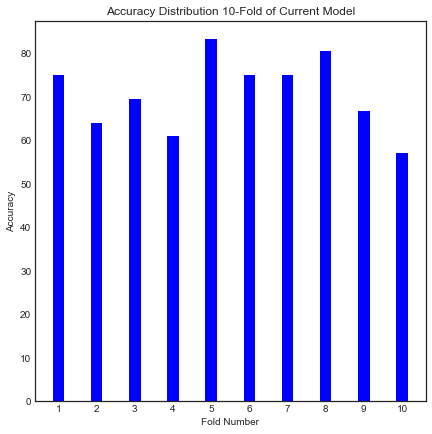


STEP 6

Returning the training and the testing sets that will be used later on!
Classifier initializations successfully completed!
Current error: 4.998894288923653e-05

Gradient Descent converged successfully in 4049 iterations.
Final model accuracy: 79.56989247311827%


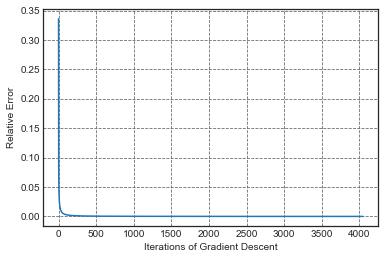

In [34]:
# Run the Bank Data for Model 2 with all the features
X_train1, Y_train1, X_test1, Y_test1,f_Iter1,avgA1,lr_old = runExperiment(Xb, Yb,2, 0.45, 1e-3, 0.795, 0.1, STD=True)
currentEror_vecotr,iterations = runModelSelected(X_train1, Y_train1, X_test1, Y_test1, 0.45, 0.5e-4, 0.1,STD=True)
plt.plot(currentEror_vecotr)
plt.xlabel('Iterations of Gradient Descent') 
plt.ylabel('Relative Error')
# plt.title(f"Average Accuracy vs Learning Rate for Bankrupcy Data using Model order {model}")
plt.grid(b=True, which='major', color='#666666', linestyle='--')
plt.show()

2) Experimentation for different data sets for model selection and feature removal 


Step 0: Modifying the model order of our data set (choosing which features etc)

The order of the linear model is now: 2
Dataset model order used in this model simulation: 2

STEP 1

K-Fold class initializations successfully completed!


STEP 2

Number of samples per fold: 35
Remaining samples after dividing by 10: 9
Finished splitting the data into training and testing porportions!

The SIZE OF THE XTRAIN IS: 359
The SIZE OF THE TOTAL IS: 452
Classifier initializations successfully completed!
Starting fold 1 simulation....

Skipping validation set 1!
Current error: 0.000998396079727114

Gradient Descent converged successfully in 284 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 323 
Accuracy on fold 1: 77.77777777777779% 

Starting fold 2 simulation....

Skipping validation set 2!
Current error: 0.0009971536919153156

Gradient Descent converged successfully in 253 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 323 
Accuracy on fold 2: 63.88888888888

<ipython-input-22-6c5a4669e219>:21: RuntimeWarning: overflow encountered in exp
  sig = 1/(1+np.exp(-a))


Current error: 0.0009971726191775096

Gradient Descent converged successfully in 257 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 323 
Accuracy on fold 8: 77.77777777777779% 

Starting fold 9 simulation....

Skipping validation set 9!
Current error: 0.000999477443931803

Gradient Descent converged successfully in 259 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 323 
Accuracy on fold 9: 69.44444444444444% 

Starting fold 10 simulation....

Skipping validation set 10!
Current error: 0.0009968194990933577

Gradient Descent converged successfully in 267 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 324 
Accuracy on fold 10: 57.14285714285714% 

Avg error for current model is: 27.8968253968254%

The avagerage accuracy for this model is: 72.10317460317461 %


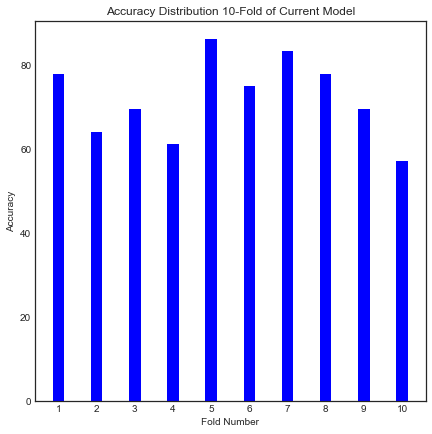


STEP 6

Returning the training and the testing sets that will be used later on!
Classifier initializations successfully completed!
Current error: 4.999361518977344e-05

Gradient Descent converged successfully in 3956 iterations.
Final model accuracy: 80.64516129032258%


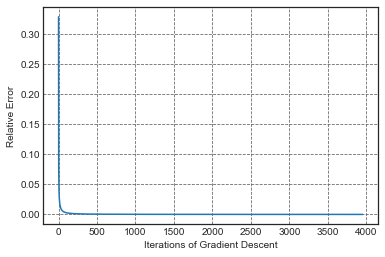

In [35]:
# Run the Bank Data for Model 2 with removed features
X_train1, Y_train1, X_test1, Y_test1,f_Iter1,avgA1,lr_old = runExperiment(Xbr, Yb,2, 0.45, 1e-3, 0.795, 0.1, STD=True)
currentEror_vecotr,Iterations = runModelSelected(X_train1, Y_train1, X_test1, Y_test1, 0.45, 0.5e-4, 0.1,STD=True)
plt.plot(currentEror_vecotr)
plt.xlabel('Iterations of Gradient Descent')  
plt.ylabel('Relative Error')
# plt.title(f"Average Accuracy vs Learning Rate for Bankrupcy Data using Model order {model}")
plt.grid(b=True, which='major', color='#666666', linestyle='--')
plt.show()

3) Experimentation for different data sets for model selection and feature removal 


Step 0: Modifying the model order of our data set (choosing which features etc)

The order of the linear model is now: 3
Dataset model order used in this model simulation: 3

STEP 1

K-Fold class initializations successfully completed!


STEP 2

Number of samples per fold: 11
Remaining samples after dividing by 10: 2
Finished splitting the data into training and testing porportions!

The SIZE OF THE XTRAIN IS: 112
The SIZE OF THE TOTAL IS: 141
Classifier initializations successfully completed!
Starting fold 1 simulation....

Skipping validation set 1!
Current error: 0.0009973555380992799

Gradient Descent converged successfully in 232 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 100 
Accuracy on fold 1: 83.33333333333334% 

Starting fold 2 simulation....

Skipping validation set 2!
Current error: 0.0009985133161899376

Gradient Descent converged successfully in 278 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 100 
Accuracy on fold 2: 66.6666666666

<ipython-input-22-6c5a4669e219>:21: RuntimeWarning: overflow encountered in exp
  sig = 1/(1+np.exp(-a))


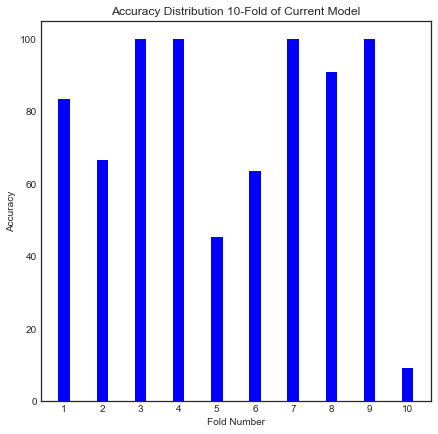


STEP 6

Returning the training and the testing sets that will be used later on!
Classifier initializations successfully completed!
Current error: 4.9982395669676815e-05

Gradient Descent converged successfully in 2740 iterations.
Final model accuracy: 93.10344827586206%


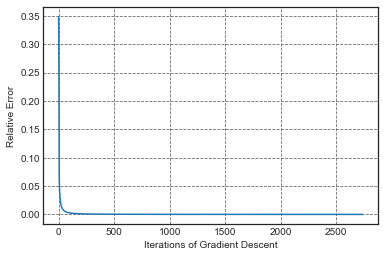

In [37]:
# Run the Hep Data for Model 3 with all the features
X_train1, Y_train1, X_test1, Y_test1,f_Iter1,avgA1,lr_old = runExperiment(Xh, Yh,3, 0.45, 1e-3, 0.795, 0.1, STD=True)
currentEror_vecotr,iterations = runModelSelected(X_train1, Y_train1, X_test1, Y_test1, 0.45, 0.5e-4, 0.1,STD=True)
plt.plot(currentEror_vecotr)
plt.xlabel('Iterations of Gradient Descent') 
plt.ylabel('Relative Error')
# plt.title(f"Average Accuracy vs Learning Rate for Bankrupcy Data using Model order {model}")
plt.grid(b=True, which='major', color='#666666', linestyle='--')
plt.show()

4) Experimentation for different data sets for model selection and feature removal 


Step 0: Modifying the model order of our data set (choosing which features etc)

The order of the linear model is now: 3
Dataset model order used in this model simulation: 3

STEP 1

K-Fold class initializations successfully completed!


STEP 2

Number of samples per fold: 11
Remaining samples after dividing by 10: 2
Finished splitting the data into training and testing porportions!

The SIZE OF THE XTRAIN IS: 112
The SIZE OF THE TOTAL IS: 141
Classifier initializations successfully completed!
Starting fold 1 simulation....

Skipping validation set 1!
Current error: 0.0009985315976025672

Gradient Descent converged successfully in 228 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 100 
Accuracy on fold 1: 83.33333333333334% 

Starting fold 2 simulation....

Skipping validation set 2!
Current error: 0.000998078312574117

Gradient Descent converged successfully in 278 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 100 
Accuracy on fold 2: 66.66666666666

<ipython-input-22-6c5a4669e219>:21: RuntimeWarning: overflow encountered in exp
  sig = 1/(1+np.exp(-a))


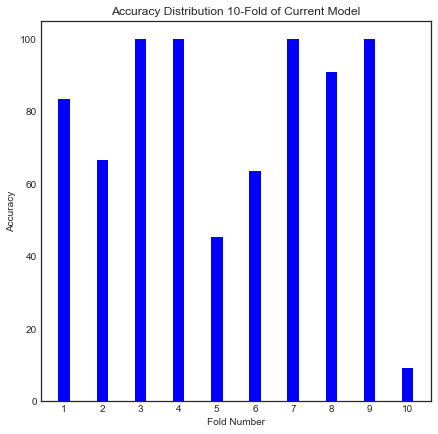


STEP 6

Returning the training and the testing sets that will be used later on!
Classifier initializations successfully completed!
Current error: 4.999091660544221e-05

Gradient Descent converged successfully in 2751 iterations.
Final model accuracy: 89.65517241379311%


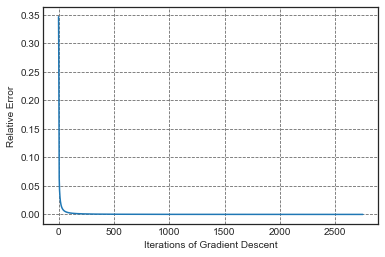

In [39]:
# Run the Hep Data for Model 3 with removed features
X_train1, Y_train1, X_test1, Y_test1,f_Iter1,avgA1,lr_old = runExperiment(Xhr, Yh,3, 0.45, 1e-3, 0.795, 0.1, STD=True)
currentEror_vecotr,iteraitons = runModelSelected(X_train1, Y_train1, X_test1, Y_test1, 0.45, 0.5e-4, 0.1,STD=True)
plt.plot(currentEror_vecotr)
plt.xlabel('Iterations of Gradient Descent') 
plt.ylabel('Relative Error')
# plt.title(f"Average Accuracy vs Learning Rate for Bankrupcy Data using Model order {model}")
plt.grid(b=True, which='major', color='#666666', linestyle='--')
plt.show()

**Plotting Graphs For Report**


Step 0: Modifying the model order of our data set (choosing which features etc)

The order of the linear model is now: 2
Dataset model order used in this model simulation: 2

STEP 1

K-Fold class initializations successfully completed!


STEP 2

Number of samples per fold: 11
Remaining samples after dividing by 10: 2
Finished splitting the data into training and testing porportions!

The SIZE OF THE XTRAIN IS: 112
The SIZE OF THE TOTAL IS: 141
Classifier initializations successfully completed!
Starting fold 1 simulation....

Skipping validation set 1!
Current error: 0.000995701480154574

Gradient Descent converged successfully in 221 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 100 
Accuracy on fold 1: 83.33333333333334% 

Starting fold 2 simulation....

Skipping validation set 2!
Current error: 0.0009992320764070153

Gradient Descent converged successfully in 265 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 100 
Accuracy on fold 2: 66.66666666666

<ipython-input-22-6c5a4669e219>:21: RuntimeWarning: overflow encountered in exp
  sig = 1/(1+np.exp(-a))


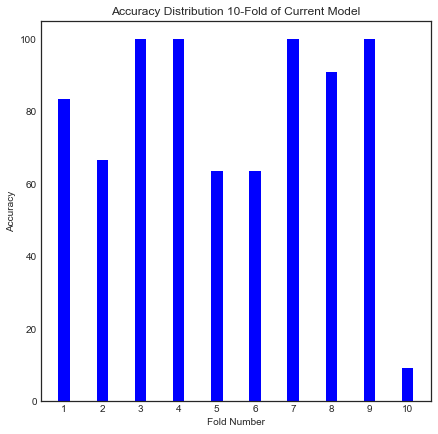


STEP 6

Returning the training and the testing sets that will be used later on!
Classifier initializations successfully completed!
Current error: 4.9997658369377715e-05

Gradient Descent converged successfully in 14561 iterations.
Final model accuracy: 89.65517241379311%


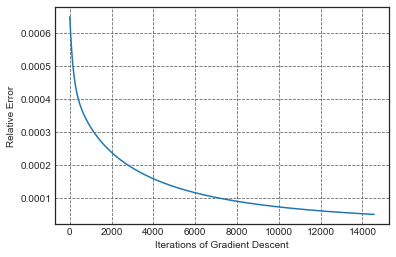

Classifier initializations successfully completed!
Current error: 4.999946605212014e-05

Gradient Descent converged successfully in 17967 iterations.
Final model accuracy: 89.65517241379311%


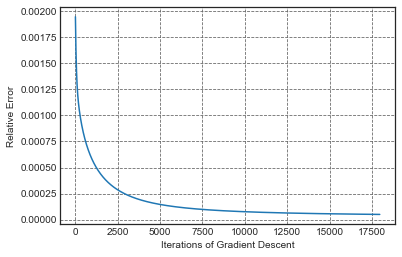

Classifier initializations successfully completed!
Current error: 4.9999979215888625e-05

Gradient Descent converged successfully in 75000 iterations.
Final model accuracy: 89.65517241379311%


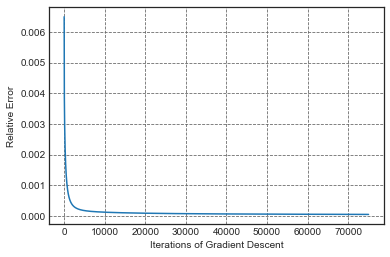

Classifier initializations successfully completed!
Current error: 4.999992185185719e-05

Gradient Descent converged successfully in 274673 iterations.
Final model accuracy: 86.20689655172413%


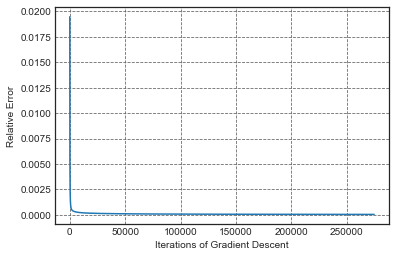

Classifier initializations successfully completed!
Current error: 4.999998953269626e-05

Gradient Descent converged successfully in 1360999 iterations.
Final model accuracy: 89.65517241379311%


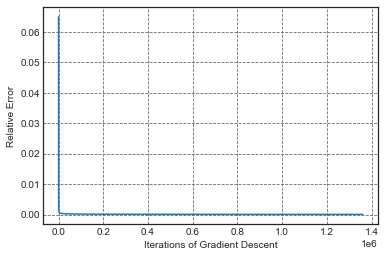

Classifier initializations successfully completed!
Current error: 4.999998506315099e-05

Gradient Descent converged successfully in 2694485 iterations.
Final model accuracy: 89.65517241379311%


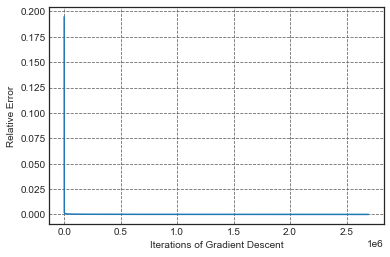

Classifier initializations successfully completed!
Current error: 4.9999989784908e-05

Gradient Descent converged successfully in 2846065 iterations.
Final model accuracy: 89.65517241379311%


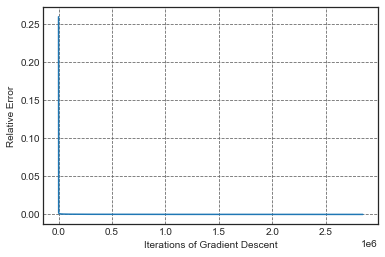

In [40]:
# Get the plots for the learning rate 
X_train1, Y_train1, X_test1, Y_test1,f_Iter1,avgA1,lr_old = runExperiment(Xhr, Yh,2, 0.45, 1e-3, 0.795, 0.1, STD=True)

# constant learning rate 
decay = 0
learning_rate = np.array([0.001, 0.003, 0.01, 0.03,0.1,0.3,0.4])
for alpha in learning_rate:
    currentEror_vecotr, iterations = runModelSelected(X_train1, Y_train1, X_test1, Y_test1, alpha, 0.5e-4, decay,STD=True)
    plt.plot(currentEror_vecotr)
    plt.xlabel('Iterations of Gradient Descent') 
    plt.ylabel('Relative Error')
# plt.title(f"Average Accuracy vs Learning Rate for Bankrupcy Data using Model order {model}")
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.show()


Step 0: Modifying the model order of our data set (choosing which features etc)

The order of the linear model is now: 2
Dataset model order used in this model simulation: 2

STEP 1

K-Fold class initializations successfully completed!


STEP 2

Number of samples per fold: 35
Remaining samples after dividing by 10: 9
Finished splitting the data into training and testing porportions!

The SIZE OF THE XTRAIN IS: 359
The SIZE OF THE TOTAL IS: 452
Classifier initializations successfully completed!
Starting fold 1 simulation....

Skipping validation set 1!
Current error: 0.000998396079727114

Gradient Descent converged successfully in 284 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 323 
Accuracy on fold 1: 77.77777777777779% 

Starting fold 2 simulation....

Skipping validation set 2!
Current error: 0.0009971536919153156

Gradient Descent converged successfully in 253 iterations.
ZZZZZZZZZZ    size of X_train in each fit function: 323 
Accuracy on fold 2: 63.88888888888

<ipython-input-22-6c5a4669e219>:21: RuntimeWarning: overflow encountered in exp
  sig = 1/(1+np.exp(-a))


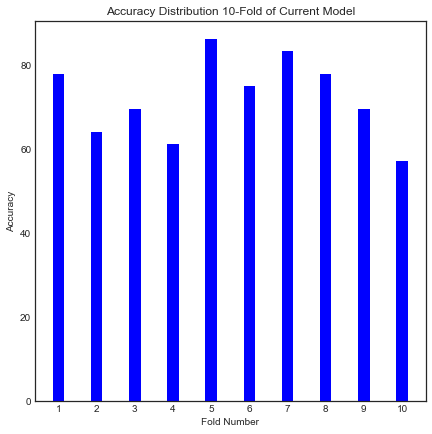


STEP 6

Returning the training and the testing sets that will be used later on!
Classifier initializations successfully completed!
Current error: 4.9999200537486675e-05

Gradient Descent converged successfully in 21751 iterations.
Final model accuracy: 78.49462365591397%


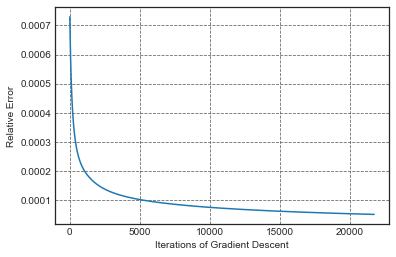

Classifier initializations successfully completed!
Current error: 4.999984401893279e-05

Gradient Descent converged successfully in 44953 iterations.
Final model accuracy: 78.49462365591397%


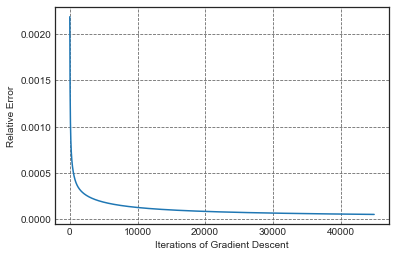

Classifier initializations successfully completed!
Current error: 4.999993228086494e-05

Gradient Descent converged successfully in 93251 iterations.
Final model accuracy: 77.41935483870968%


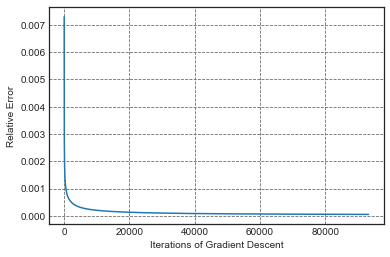

Classifier initializations successfully completed!
Current error: 4.999998273506721e-05

Gradient Descent converged successfully in 255176 iterations.
Final model accuracy: 75.26881720430107%


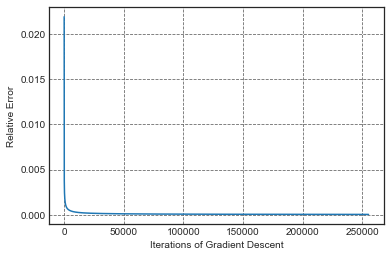

Classifier initializations successfully completed!
Current error: 4.999997422462817e-05

Gradient Descent converged successfully in 906096 iterations.
Final model accuracy: 68.81720430107528%


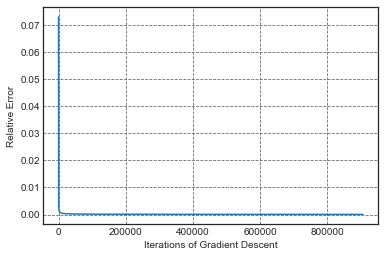

Classifier initializations successfully completed!
Current error: 4.999999308788042e-05

Gradient Descent converged successfully in 2484021 iterations.
Final model accuracy: 65.59139784946237%


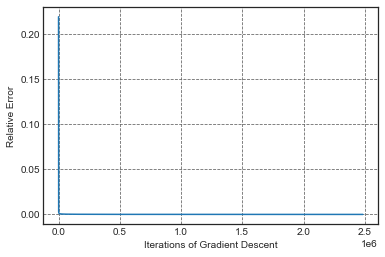

Classifier initializations successfully completed!
Current error: 4.999999648301689e-05

Gradient Descent converged successfully in 3374402 iterations.
Final model accuracy: 65.59139784946237%


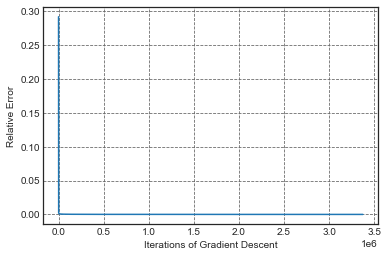

In [41]:
# Get the plots for the learning rate 
X_train1, Y_train1, X_test1, Y_test1,f_Iter1,avgA1,lr_old = runExperiment(Xbr, Yb,2, 0.45, 1e-3, 0.795, 0.1, STD=True)

# constant learning rate 
decay = 0
learning_rate = np.array([0.001, 0.003, 0.01, 0.03,0.1,0.3,0.4])
for alpha in learning_rate:
    currentEror_vecotr,iteration = runModelSelected(X_train1, Y_train1, X_test1, Y_test1, alpha, 0.5e-4, decay,STD=True)
    plt.plot(currentEror_vecotr)
    plt.xlabel('Iterations of Gradient Descent') 
    plt.ylabel('Relative Error')
# plt.title(f"Average Accuracy vs Learning Rate for Bankrupcy Data using Model order {model}")
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.show()

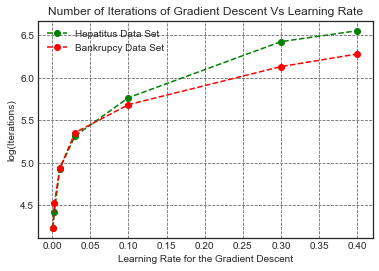

In [42]:
# plot the iterations vs Cosntant Learning rate for hepatitus Data
learning_rate = np.array([0.001, 0.003, 0.01, 0.03,0.1,0.3,0.4])
Iterations_Hepa  = np.array([17190,26572,84902,206341,582421,2664443,3577201])
Iterations_Bank  = np.array([16828 ,33664,85841 ,225961 ,482339,1353891 ,1903861 ])
# plt.plot(learning_rate,Iterations_Hepa,'go--')
# plt.plot(learning_rate,Iterations_bank,'ro--')
plt.plot(learning_rate,np.log10(Iterations_Hepa),'go--')
plt.plot(learning_rate,np.log10(Iterations_Bank),'ro--')
plt.legend(["Hepatitus Data Set", "Bankrupcy Data Set"])
plt.xlabel('Learning Rate for the Gradient Descent') 
plt.ylabel('log(Iterations)')
plt.title('Number of Iterations of Gradient Descent Vs Learning Rate')
plt.grid(b=True, which='major', color='#666666', linestyle='--')
plt.show()